# Разведочный анализ данных

Автор: Ососов Ян

## Описание данных

Т-Банк: поездки на самокатах
Т-Город — это группа сервисов, которые помогают пользователям решать ежедневные
задачи. Например, есть сервисы, которые позволяют купить билеты в кино или заказать
продукты и так далее. В частности, существует сервис для аренды электросамокатов
«Самокаты» — именно ему посвящена данная база.
Сервис позволяет воспользоваться самокатом от Юрента через приложение Т-Банка.
Чтобы арендовать самокат, клиенту необходимо зайти в приложение, открыть сервис
«Самокаты» и отсканировать QR-код на руле самоката. В этот момент у клиента
со счета списывается фиксированная сумма в качестве взноса. В конце поездки
также списывается итоговая сумма за поездку.
Данные охватывают сезон аренды самокатов 2024 года (с апреля по октябрь 2024).
Стоимость минуты и стоимость поездки измеряется в условных денежных единицах

- `order_rk` Идентификатор заказа (поездки)
- `party_rk_id` Идентификатор клиента
- `minute_cost` Стоимость минуты
- `hold_amount` Размер суммы, которая замораживается на счете в момент взятия самоката
- `transport_model` Название модели самоката
- `distance_km` Километраж поездки
- `created_dttm` Дата и время создания заказа
- `book_start_dttm` Дата и время начала поездки
- `book_end_dttm` Дата и время завершения поездки
- `book_time_zone_cd` Часовой пояс
- `local_book_start_dttm` Дата и время начала поездки в часовом поясе человека,который брал самокат
- `nominal_price_rub_amt` Стоимость поездки
- `loyalty_accrual_rub_amt` Размер выплаченного кэшбэка в рублях
- `loyalty_accrual_bns_amt` Размер выплаченного кэшбэка в бонусах (если оплата происходила с помощью кредитной карты)
- `Gender_cd` Пол клиента
- `Age` Возраст клиента
- `Education_level` Уровень образования клиента:
SCH — начальное, среднее
GRD — высшее
UGR — неполное высшее
PGR — два высших
ACD — ученая степень
- `lvn_state_nm` Регион проживания человека
- `marital_status_cd` Семейный статус человека:
IMR — состоит в незарегистрированном браке
MAR —женат/замужем
DLW — не проживает с супругом(ой)
OMR — состоит в зарегистрированном браке
CIV — гражданский брак
UNM — холост/не замужем
DIV — разведен(а)
FAL — никогда не состоял(а) в браке
WID — вдовец/вдова

## Содержание

- Предобработка данных
  - Знакомство с данными
  - Пропуски
  - Распределение данных
  - Типы данных
  - Дубликаты
  - Промежуточные ввыводы по предобработке данных
- Анализ активности пользователей

## Знакомство с данными

In [1]:
# Исполььзуемые библиотеки в исследовании
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
df = pd.read_csv('kicksharing.csv')
display(df.info())
display(df.head())
display(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

None

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


(396749, 20)

Описание датасета не полностью соответствует описанию.

Датасет соджержит 20 столбцов, 396748 строк а не 19 заявленыых.
activation_cost - столбец, про который не было заявлено, вероятнее всего важен при образовании общей цены поездки, это стоимость 'старта'

Можно заметить сразу, что таблица содержит пропуски.

Также сразу можно заметить, что даты не приведены к соотв типу даных, также некоторые типы данных можно привести к более оптимальным.

Также необходимо провести проверку на наличие явных и неявных дубликатов

### Пропуски

In [3]:
display(df.isna().sum() / df.shape[0])
display(df.isna().sum())

order_rk                   0.000000
party_rk                   0.000000
gender_cd                  0.007362
age                        0.000000
education_level_cd         0.520959
marital_status_cd          0.451217
lvn_state_nm               0.086143
minute_cost                0.000000
activation_cost            0.000000
hold_amount                0.000000
transport_model            0.000000
distance_km                0.000000
created_dttm               0.000000
book_start_dttm            0.000000
book_end_dttm              0.000000
book_time_zone_cd          0.000000
local_book_start_dttm      0.000000
nominal_price_rub_amt      0.000000
loyalty_accrual_rub_amt    0.075002
loyalty_accrual_bns_amt    0.944680
dtype: float64

order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

In [4]:
missing_ratio = df.isna().sum() / df.shape[0]

display(missing_ratio[missing_ratio > 0])

missing_count = df.isna().sum()
display(missing_count[missing_count > 0])

gender_cd                  0.007362
education_level_cd         0.520959
marital_status_cd          0.451217
lvn_state_nm               0.086143
loyalty_accrual_rub_amt    0.075002
loyalty_accrual_bns_amt    0.944680
dtype: float64

gender_cd                    2921
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

Можно увидеть что пропуски содеражтся в двух столбцах loyalty_accrual_rub_amt, loyalty_accrual_bns_amt численного типа. NaN может говорить лишь об отсутсвии бонусов или кешбека за поездку, пока не понятны по каим причинам не начисяялется кешбек (может не выбраны категории, или начилсяются бонусы тк нет дебетовой карты), но для удобства заполним все такие пропуски 0 для удобства

In [5]:
df_old = df.copy(deep=True)

In [6]:
df['loyalty_accrual_rub_amt'].fillna(0, inplace = True)
display(df[df['loyalty_accrual_rub_amt'].isna()].head(5))
display(df[df['loyalty_accrual_rub_amt'] == 0]['loyalty_accrual_rub_amt'].count())

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt


29757

In [7]:
df['loyalty_accrual_bns_amt'].fillna(0, inplace = True)
display(df[df['loyalty_accrual_bns_amt'].isna()].head(5))
display(df[df['loyalty_accrual_bns_amt'] == 0]['loyalty_accrual_bns_amt'].count())

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt


374801

Да, можно заметить что до заполнения 0, ни один из двух столбцов не содеражл 0

Также пропуски содержаться в категориальных данныых: пол, образование, семейное положение, регион

In [8]:
display(df['gender_cd' ].unique())
display(df['age' ].unique())
display(df['marital_status_cd' ].unique())
display(df['education_level_cd' ].unique())
display(df['lvn_state_nm' ].unique())

array(['M', 'F', nan], dtype=object)

array([40, 30, 28, 24, 34, 42, 19, 38, 31, 18, 22, 32, 39, 45, 59, 20, 27,
       33, 53, 21, 23, 35, 26, 41, 46, 43, 37, 49, 36, 25, 50, 29, 52, 47,
       44, 54, 67, 69, 56, 84, 75, 58, 66, 61, 51, 55, 77, 48, 63, 60, 64,
       74, 57, 62, 68, 76, 65, 89, 72, 71, 70, 79, 78, 80, 16, 73, 94, 15,
       87, 83, 85, 17, 14, 12, 86, 88, 82], dtype=int64)

array(['DIV', 'MAR', 'UNM', nan, 'CIV', 'WID'], dtype=object)

array(['UGR', 'GRD', nan, 'SCH', 'PGR', 'ACD'], dtype=object)

array(['ТЮМЕНСКАЯ ОБЛ', 'РОСТОВСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛ', 'Г МОСКВА',
       'МОСКВА', 'РЕСП ТАТАРСТАН', 'НОВОСИБИРСКАЯ ОБЛ', 'ЧЕЛЯБИНСКАЯ ОБЛ',
       nan, 'НИЖЕГОРОДСКАЯ ОБЛ', 'КРАСНОДАРСКИЙ КРАЙ', 'МОСКОВСКАЯ ОБЛ',
       'КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС', 'КРАСНОЯРСКИЙ КРАЙ',
       'СМОЛЕНСКАЯ ОБЛ', 'ИРКУТСКАЯ ОБЛ', 'ОРЛОВСКАЯ ОБЛ',
       'Г САНКТ-ПЕТЕРБУРГ', 'РЕСП БАШКОРТОСТАН', 'ПСКОВСКАЯ ОБЛ',
       'ВОЛОГОДСКАЯ ОБЛ', 'РЕСП МАРИЙ ЭЛ', 'ВОРОНЕЖСКАЯ ОБЛ',
       'САМАРСКАЯ ОБЛ', 'АСТРАХАНСКАЯ ОБЛ', 'БЕЛГОРОДСКАЯ ОБЛ',
       'АЛТАЙСКИЙ КРАЙ', 'ЛИПЕЦКАЯ ОБЛ', 'САРАТОВСКАЯ ОБЛ',
       'ЛЕНИНГРАДСКАЯ ОБЛ', 'ПЕРМСКИЙ КРАЙ', 'САХАЛИНСКАЯ ОБЛ',
       'РЕСП УДМУРТСКАЯ', 'РЕСП КРЫМ', 'КАЛИНИНГРАДСКАЯ ОБЛ',
       'ТВЕРСКАЯ ОБЛ', 'СТАВРОПОЛЬСКИЙ КРАЙ',
       'РЕСП СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ', 'УДМУРТСКАЯ РЕСП',
       'ИВАНОВСКАЯ ОБЛ', 'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО',
       'ПРИМОРСКИЙ КРАЙ', 'ВОЛГОГРАДСКАЯ ОБЛ', 'Г СЕВАСТОПОЛЬ',
       'ТОМСКАЯ ОБЛ', 'РЕСП ЧЕЧЕНСКАЯ',

Первое и важное, если будет проводиться анализ в разрезе региона, важно убрать неявные дубликаты в столбце с регионом(Пример: 'МОСКВА', 'Г МОСКВА', 'Г. МОСКВА'), также есть странные регионы 'ПОЛЬША', 'ISRAEL'. Важно понимать что эсть на мамом деле столбец `'lvn_state_nm'`, регион пользователся , в котором он живет или использовал самокат (ведь последнее важнее), по столбцу `book_time_zone_cd` можно условно найти пользователей из одного региона, который пользоваклся самокатом в другом регионе (если часовой пояс отличается от пояса региона (однако это совпадение не обязательно говорит об обратном можно жить в СПБ и использовать самокат в МСК и таким способом))

Пропуски в столбце пол, образование можно трактовать как неизветсно и заполнить 'UNKNOWON' (Неизввестно), если строки с пропуском пола можно в целом почистить меньше 1 процента, одако это крайняя мера, введь эти данные могут быть в целом содержательными, пропуски в семейном положени и образовани мы точно не можем удалить и тоже заполним 'UN', (стоит закметить что не все возможные категории содержатся в этом столбце)

In [9]:
df.fillna('UNKNOWN', inplace = True)

In [10]:
display(df['gender_cd' ].unique())
display(df['age' ].unique())
display(df['marital_status_cd' ].unique())
display(df['education_level_cd' ].unique())
display(df['lvn_state_nm' ].unique())

array(['M', 'F', 'UNKNOWN'], dtype=object)

array([40, 30, 28, 24, 34, 42, 19, 38, 31, 18, 22, 32, 39, 45, 59, 20, 27,
       33, 53, 21, 23, 35, 26, 41, 46, 43, 37, 49, 36, 25, 50, 29, 52, 47,
       44, 54, 67, 69, 56, 84, 75, 58, 66, 61, 51, 55, 77, 48, 63, 60, 64,
       74, 57, 62, 68, 76, 65, 89, 72, 71, 70, 79, 78, 80, 16, 73, 94, 15,
       87, 83, 85, 17, 14, 12, 86, 88, 82], dtype=int64)

array(['DIV', 'MAR', 'UNM', 'UNKNOWN', 'CIV', 'WID'], dtype=object)

array(['UGR', 'GRD', 'UNKNOWN', 'SCH', 'PGR', 'ACD'], dtype=object)

array(['ТЮМЕНСКАЯ ОБЛ', 'РОСТОВСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛ', 'Г МОСКВА',
       'МОСКВА', 'РЕСП ТАТАРСТАН', 'НОВОСИБИРСКАЯ ОБЛ', 'ЧЕЛЯБИНСКАЯ ОБЛ',
       'UNKNOWN', 'НИЖЕГОРОДСКАЯ ОБЛ', 'КРАСНОДАРСКИЙ КРАЙ',
       'МОСКОВСКАЯ ОБЛ', 'КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС',
       'КРАСНОЯРСКИЙ КРАЙ', 'СМОЛЕНСКАЯ ОБЛ', 'ИРКУТСКАЯ ОБЛ',
       'ОРЛОВСКАЯ ОБЛ', 'Г САНКТ-ПЕТЕРБУРГ', 'РЕСП БАШКОРТОСТАН',
       'ПСКОВСКАЯ ОБЛ', 'ВОЛОГОДСКАЯ ОБЛ', 'РЕСП МАРИЙ ЭЛ',
       'ВОРОНЕЖСКАЯ ОБЛ', 'САМАРСКАЯ ОБЛ', 'АСТРАХАНСКАЯ ОБЛ',
       'БЕЛГОРОДСКАЯ ОБЛ', 'АЛТАЙСКИЙ КРАЙ', 'ЛИПЕЦКАЯ ОБЛ',
       'САРАТОВСКАЯ ОБЛ', 'ЛЕНИНГРАДСКАЯ ОБЛ', 'ПЕРМСКИЙ КРАЙ',
       'САХАЛИНСКАЯ ОБЛ', 'РЕСП УДМУРТСКАЯ', 'РЕСП КРЫМ',
       'КАЛИНИНГРАДСКАЯ ОБЛ', 'ТВЕРСКАЯ ОБЛ', 'СТАВРОПОЛЬСКИЙ КРАЙ',
       'РЕСП СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ', 'УДМУРТСКАЯ РЕСП',
       'ИВАНОВСКАЯ ОБЛ', 'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА АО',
       'ПРИМОРСКИЙ КРАЙ', 'ВОЛГОГРАДСКАЯ ОБЛ', 'Г СЕВАСТОПОЛЬ',
       'ТОМСКАЯ ОБЛ', 'РЕСП ЧЕЧЕН

In [11]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                396749 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       396749 non-null  object 
 5   marital_status_cd        396749 non-null  object 
 6   lvn_state_nm             396749 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

None

Пропсуки заполнены


### Значения в столбцах

#### order_rk

In [12]:
display(len(df['order_rk'].unique()))

396749

На всякий случай проверили на наличие явных дубликатов PK - их нет

#### party_rk

In [13]:
display(len(df['party_rk'].unique()))

64052

Оценили кол-во уникальных юзеров. Можно попробовать дозаполнить неизвестные категориальные данные (пол, город и тд)

#### gender_cd

In [14]:
un_user = df[df['gender_cd'] == 'UNKNOWN']['party_rk'].unique()
display(len(un_user))

490

In [15]:
display(df['party_rk'].nunique())
display(df.groupby(['gender_cd', 'party_rk']).ngroups)

64052

64052

Можем заметить, что дополнить информацию о гендере не получится

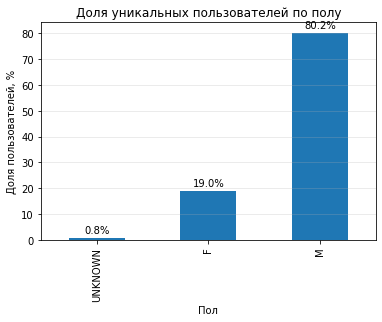

In [16]:
gender_share = (
    df.groupby('gender_cd')['party_rk']
      .nunique()                              
      .div(df['party_rk'].nunique())          
      .mul(100)                               
      .sort_values()
)

ax = gender_share.plot(kind='bar', figsize=(6,4))

plt.title('Доля уникальных пользователей по полу')
plt.xlabel('Пол')
plt.ylabel('Доля пользователей, %')
plt.grid(axis='y', alpha=0.3)

ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge', padding=3)

plt.show()

In [17]:
display(df.groupby('gender_cd')['party_rk'].nunique())

gender_cd
F          12163
M          51399
UNKNOWN      490
Name: party_rk, dtype: int64

Львиная доля пользователей - мужчиныы 80,2 %

#### age

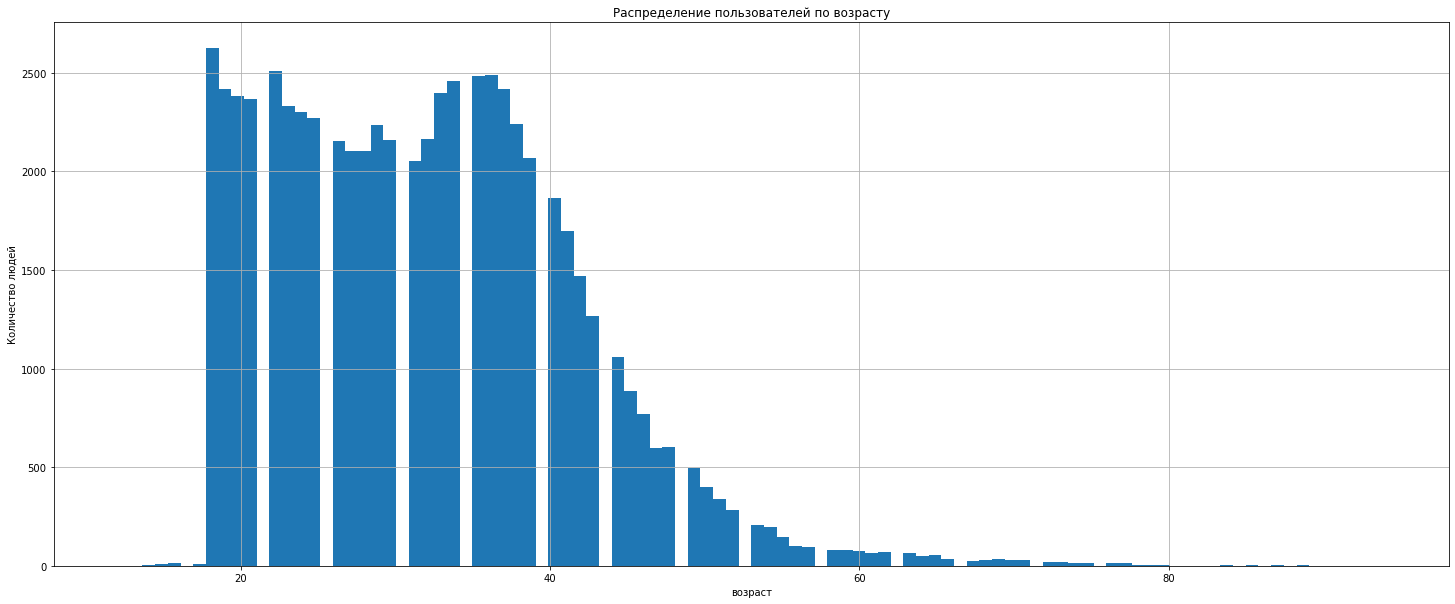

In [18]:
df_user_age = df.groupby('party_rk')['age'].first()
df_user_age.hist(bins=100, figsize=(25,10))
plt.title('Распределение пользователей по возрасту')
plt.xlabel('возраст')
plt.ylabel('Количество людей')
plt.show()

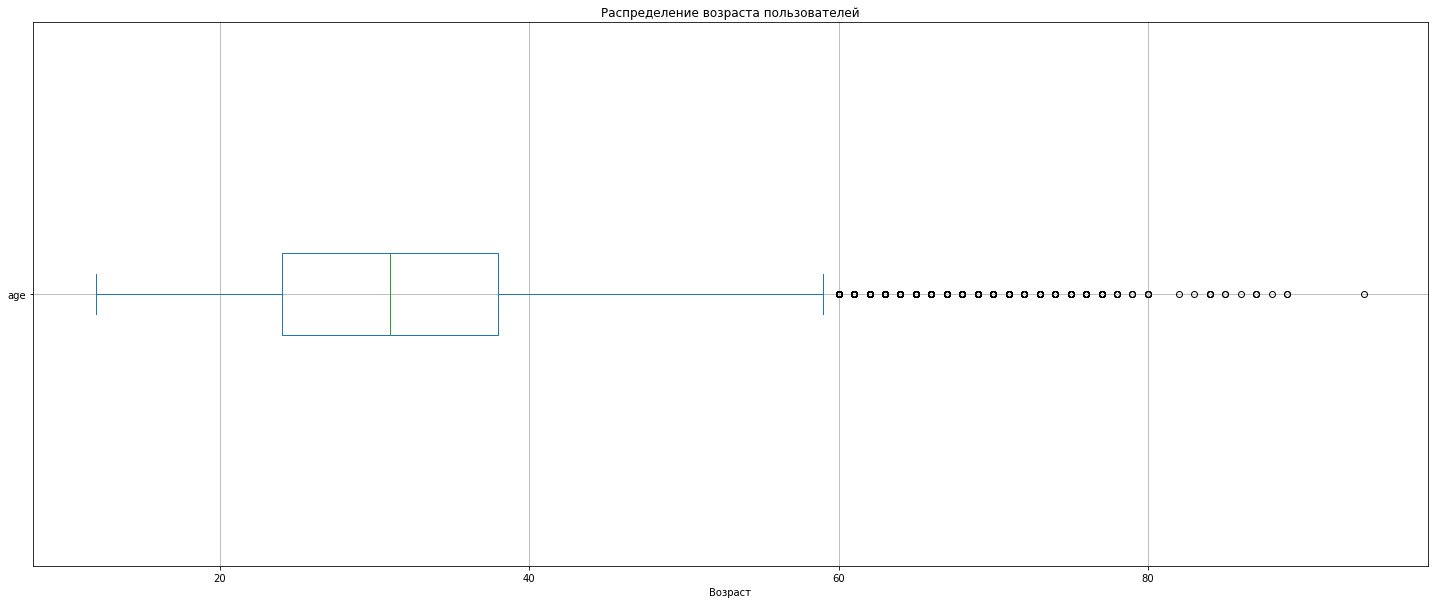

In [19]:
df_user_age.plot(kind='box', vert=False, figsize=(25,10), grid=True)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.show()

In [20]:
display(df_user_age.describe())

count    64052.000000
mean        32.010210
std          9.595817
min         12.000000
25%         24.000000
50%         31.000000
75%         38.000000
max         94.000000
Name: age, dtype: float64

In [21]:

q01 = df_user_age.quantile(0.01)
q99 = df_user_age.quantile(0.99)

display(q01)
display(q99)

display(df_user_age[df_user_age > q99].count())
display(df_user_age[df_user_age > q99].count() / df_user_age.shape[0])


display(df_user_age[df_user_age < q01].count())
display(df_user_age[df_user_age < q01].count() / df_user_age.shape[0])

18.0

60.0

602

0.009398613626428527

35

0.0005464310247923562

Заметим что, очень мало пользователей младше 18, и в целом наверное несовершеннолетная аудитория и ее активность неинтересна в качестве исследоввания, также заметим что пенсионеры тоже пользуются самокатами, однако пользователей старше 60 меньше 1 процента. Ограничим наши данные информацию о пользователях от 18 и до 60 лет включительно 

In [22]:
df = df[(df['age'] >= q01) & (df['age'] <= q99)]

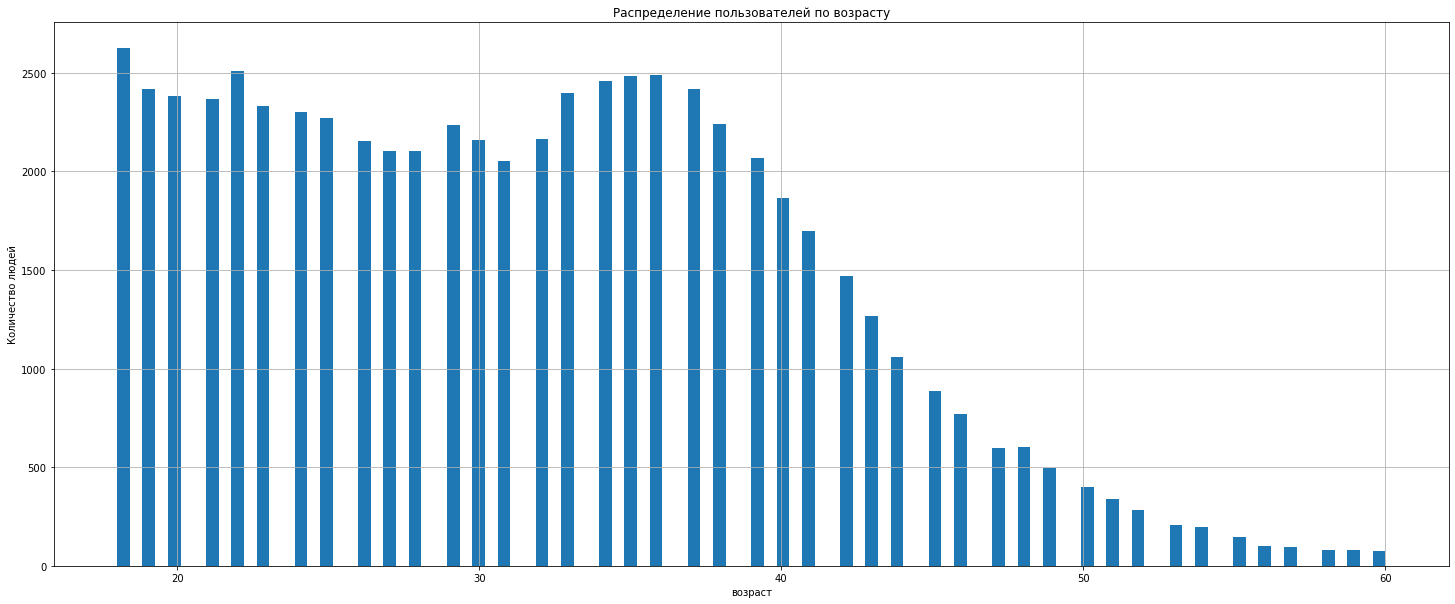

In [23]:
df_user_age = df.groupby('party_rk')['age'].first()
df_user_age.hist(bins=100, figsize=(25,10))
plt.title('Распределение пользователей по возрасту')
plt.xlabel('возраст')
plt.ylabel('Количество людей')
plt.show()

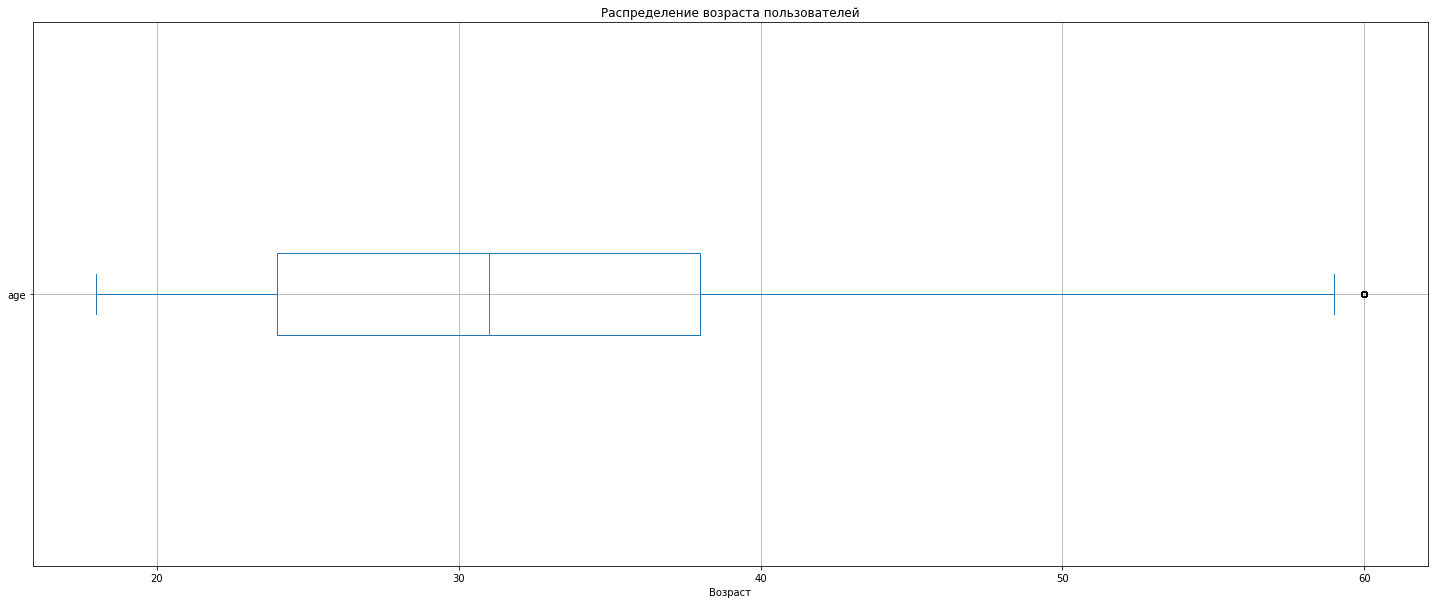

In [24]:
df_user_age.plot(kind='box', vert=False, figsize=(25,10), grid=True)
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.show()

In [25]:
display(df_user_age.describe())

count    63415.000000
mean        31.684948
std          8.982011
min         18.000000
25%         24.000000
50%         31.000000
75%         38.000000
max         60.000000
Name: age, dtype: float64

In [26]:
display(df.info())
display(df_old.shape[0] - df.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393046 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 393046 non-null  int64  
 1   party_rk                 393046 non-null  int64  
 2   gender_cd                393046 non-null  object 
 3   age                      393046 non-null  int64  
 4   education_level_cd       393046 non-null  object 
 5   marital_status_cd        393046 non-null  object 
 6   lvn_state_nm             393046 non-null  object 
 7   minute_cost              393046 non-null  float64
 8   activation_cost          393046 non-null  float64
 9   hold_amount              393046 non-null  float64
 10  transport_model          393046 non-null  object 
 11  distance_km              393046 non-null  float64
 12  created_dttm             393046 non-null  object 
 13  book_start_dttm          393046 non-null  object 
 14  book

None

3703

Удалено 3703 строки, теперь данные содержат только пользователей в возрастных ракмках [18, 60]

#### education_level_cd

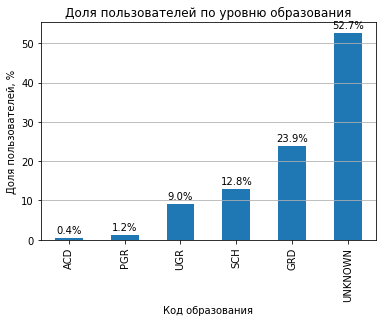

In [27]:
education_level_share = (
    df.groupby('education_level_cd')['party_rk']
      .nunique()
      .div(df['party_rk'].nunique())   
      .mul(100)                      
      .sort_values()
)

ax =education_level_share.plot(kind='bar', figsize=(6,4))

plt.title('Доля пользователей по уровню образования')
plt.xlabel('Код образования')
plt.ylabel('Доля пользователей, %')
plt.grid(axis='y')

ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge', padding=3)

plt.show()

Можно заметить что есть категории образования пользователей, доля которых чуть больше 1 процента или даже меньше. Однако доля пользователей с неизвестным уровнем образованияболее 50 процентов, ничего не будем делать, если понадобится сраввнить в срезе уровня образования отфильтруем.

#### marital_status_cd

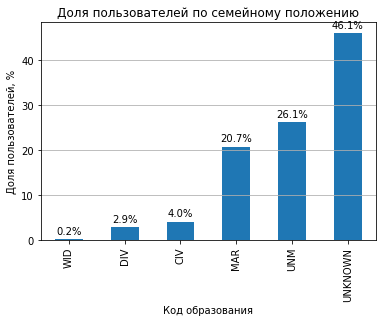

In [28]:
education_level_share = (
    df.groupby('marital_status_cd')['party_rk']
      .nunique()
      .div(df['party_rk'].nunique())   
      .mul(100)                      
      .sort_values()
)

ax =education_level_share.plot(kind='bar', figsize=(6,4))

plt.title('Доля пользователей по семейному положению')
plt.xlabel('Код образования')
plt.ylabel('Доля пользователей, %')
plt.grid(axis='y')

ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge', padding=3)

plt.show()

В целом тоже самое можно отметить и в этой категории, единственное может быть есть логика использовать это поле при проверке гипотезы того что, пользователи в браке более веротяно передвигаются на автомобиле, пока оставим так как есть

#### lvn_state_nm

In [29]:
display(df['lvn_state_nm' ].nunique())

213

In [30]:
df['lvn_state_nm'] = df['lvn_state_nm'].str.upper().str.replace(r'\.', '', regex=True)\
    .str.replace(' ОБЛАСТЬ', '', regex=False)\
    .str.replace('ОБЛАСТЬ ', '', regex=False)\
    .str.replace(' ОБЛ', '', regex=False)\
    .str.replace('ОБЛ ', '', regex=False)\
    .str.replace(' КРАЙ', '', regex=False)\
    .str.replace('КРАЙ ', '', regex=False)\
    .str.replace(' РЕСПУБЛИКА', '', regex=False)\
    .str.replace('РЕСПУБЛИКА ', '', regex=False)\
    .str.replace(' РЕСП', '', regex=False)\
    .str.replace('РЕСП ', '', regex=False)\
    .str.replace('РЕСП ', '', regex=False)\
    .str.replace(' ГОРОД', '', regex=False)\
    .str.replace('ГОРОД ', '', regex=False)\
    .str.replace(' АВТОНОМНЫЙ ОКРУГ', '', regex=False)\
    .str.replace('АВТОНОМНЫЙ ОКРУГ ', '', regex=False)\
    .str.replace(' АО', '', regex=False)\
    .str.replace('АО ', '', regex=False)\
    .str.replace(' Г', '', regex=False)\
    .str.replace('Г ', '', regex=False)
display(np.sort(df['lvn_state_nm' ].unique()))

array(['ISRAEL', 'UNKNOWN', 'АДЫГЕЯ', 'АЕВРЕЙСКАЯ', 'АЛТАЙ', 'АЛТАЙСКИЙ',
       'АМУРСКАЯ', 'АРХАНГЕЛЬСКАЯ', 'АСТРАХАНСКАЯ', 'БАЙКОНУР',
       'БАШКОРТОСТАН', 'БЕЛГОРОДСКАЯ', 'БРЕСТСКАЯ', 'БРЯНСКАЯ', 'БУРЯТИЯ',
       'ВЛАДИМИРСКАЯ', 'ВОЛГОГРАДСКАЯ', 'ВОЛОГОДСКАЯ', 'ВОРОНЕЖСКАЯ',
       'ГОМЕЛЬСКАЯ', 'ДАГЕСТАН', 'ДОНЕЦКАЯ НАРОДНАЯ', 'ЕВРЕЙСКАЯБЛ',
       'ЗАБАЙКАЛЬСКИЙ', 'ЗАПОРОЖСКАЯ', 'ЗЕЛЕНОГРАД', 'ИВАНОВСКАЯ',
       'ИНГУШЕТИЯ', 'ИРКУТСКАЯ', 'КАБАРДИНО-БАЛКАРСКАЯ',
       'КАЛИНИНГРАДСКАЯ', 'КАЛМЫКИЯ', 'КАЛУЖСКАЯ', 'КАМЧАТСКИЙ',
       'КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'КАРЕЛИЯ', 'КЕМЕРОВСКАЯ',
       'КЕМЕРОВСКАЯ - КУЗБАСС', 'КИРОВСКАЯ', 'КОМИ', 'КОСТРОМСКАЯ',
       'КРАСНОДАРСКИЙ', 'КРАСНОЯРСКИЙ', 'КРЫМ', 'КУРГАНСКАЯ', 'КУРСКАЯ',
       'ЛЕНЕНГРАДСКАЯ', 'ЛЕНИНГРАДСКАЯ', 'ЛИПЕЦКАЯ', 'ЛНР',
       'ЛУГАНСКАЯ НАРОДНАЯ', 'МАГАДАНСКАЯ', 'МАРИЙ ЭЛ', 'МО ЗАПАД',
       'МОГИЛЁВСКАЯ', 'МОГИЛЕВСКАЯ', 'МОРДОВИЯ', 'МОСКВА', 'МОСККОВСКАЯ',
       'МОСКОВСКАЯ', 'МУРМАНСКАЯ', 'НЕНЕЦКИЙ', 'НИЖЕГОРОДСК

Уже лучше теперь пойдем еденично, проверим интерресные регионы по типы ISRAEL и США, а также регионы написанные с ошибками и др.

In [31]:
region_replace = {
    'АЕВРЕЙСКАЯ': 'ЕВРЕЙСКАЯ',
    'АЛТАЙСКИЙ': 'АЛТАЙ',
    'ДОНЕЦКАЯ НАРОДНАЯ': 'ДНР',
    'ЕВРЕЙСКАЯБЛ': 'ЕВРЕЙСКАЯ',
    'КЕМЕРОВСКАЯ - КУЗБАСС': 'КЕМЕРОВСКАЯ',
    'ЛУГАНСКАЯ НАРОДНАЯ': 'ЛНР',
    'МОГИЛЁВСКАЯ': 'МОГИЛЕВСКАЯ',
    'МОСККОВСКАЯ': 'МОСКВА',
    'ЧУВАШСКАЯ - ЧУВАШИЯ': 'ЧУВАШИЯ',
    'ЧУВАШСКАЯ ЧУВАШИЯ': 'ЧУВАШИЯ',
    'РУСП ТАТАРСТАН': 'ТАТАРСТАН',
    'САХА /ЯКУТИЯ/': 'ЯКУТИЯ',
    'САМАРА': 'САМАРСКАЯ',
    'ТАТАРСТАН (ТАТАРСТАН)': 'ТАТАРСТАН',
    'ХАНТЫ-МАНСИЙСКИЙ': 'ХАНТЫ-МАНСИЙСКИЙ - ЮГРА',
    'ЕВРЕЙСКАЯБЛ': 'ЕВРЕЙСКАЯ АО',
    'ЧУВАШИЯ ЧУВАШСКАЯ -': 'ЧУВАШИЯ',
    'ЧУВАШСКАЯ - ЧУВАШИЯ': 'ЧУВАШИЯ',
    'ЧУВАШСКАЯ ЧУВАШИЯ': 'ЧУВАШИЯ',
    'ЛЕНЕНГРАДСКАЯ': 'ЛЕНИНГРАДСКАЯ',
}    


In [32]:
df['lvn_state_nm'] = df['lvn_state_nm'].replace(region_replace)
display(np.sort(df['lvn_state_nm' ].unique()))

array(['ISRAEL', 'UNKNOWN', 'АДЫГЕЯ', 'АЛТАЙ', 'АМУРСКАЯ',
       'АРХАНГЕЛЬСКАЯ', 'АСТРАХАНСКАЯ', 'БАЙКОНУР', 'БАШКОРТОСТАН',
       'БЕЛГОРОДСКАЯ', 'БРЕСТСКАЯ', 'БРЯНСКАЯ', 'БУРЯТИЯ', 'ВЛАДИМИРСКАЯ',
       'ВОЛГОГРАДСКАЯ', 'ВОЛОГОДСКАЯ', 'ВОРОНЕЖСКАЯ', 'ГОМЕЛЬСКАЯ',
       'ДАГЕСТАН', 'ДНР', 'ЕВРЕЙСКАЯ', 'ЕВРЕЙСКАЯ АО', 'ЗАБАЙКАЛЬСКИЙ',
       'ЗАПОРОЖСКАЯ', 'ЗЕЛЕНОГРАД', 'ИВАНОВСКАЯ', 'ИНГУШЕТИЯ',
       'ИРКУТСКАЯ', 'КАБАРДИНО-БАЛКАРСКАЯ', 'КАЛИНИНГРАДСКАЯ', 'КАЛМЫКИЯ',
       'КАЛУЖСКАЯ', 'КАМЧАТСКИЙ', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'КАРЕЛИЯ',
       'КЕМЕРОВСКАЯ', 'КИРОВСКАЯ', 'КОМИ', 'КОСТРОМСКАЯ', 'КРАСНОДАРСКИЙ',
       'КРАСНОЯРСКИЙ', 'КРЫМ', 'КУРГАНСКАЯ', 'КУРСКАЯ', 'ЛЕНИНГРАДСКАЯ',
       'ЛИПЕЦКАЯ', 'ЛНР', 'МАГАДАНСКАЯ', 'МАРИЙ ЭЛ', 'МО ЗАПАД',
       'МОГИЛЕВСКАЯ', 'МОРДОВИЯ', 'МОСКВА', 'МОСКОВСКАЯ', 'МУРМАНСКАЯ',
       'НЕНЕЦКИЙ', 'НИЖЕГОРОДСКАЯ', 'НОВГОРОДСКАЯ', 'НОВОЗЫБКОВСКАЯ',
       'НОВОСИБИРСКАЯ', 'ОДЕССКАЯ', 'ОМСКАЯ', 'ОРЕНБУРГСКАЯ', 'ОРЛОВСКАЯ',
       'ПЕНЗЕНСКАЯ', 

Хочется отметить что здесь перечислены все субъекты рф и даже больше, есть даже польша и США. Понятно что этот столбец лишь информация о пользователе может трактоваться откуда, но если скажем человвек перехал из израиля в москву и пользуется самоактом там данное знаение столбца неинформативно и эквивалентно UNKNOWN, понятно что точно мы не можем узнать, если информация СПБ а человек перехал в МСК, по часовому поясу не отследить. Если проводить анализ в рамках региона то некоторые регионы можно смело объеденить вв категориии UNKNOWN, ввнизу несколько примеров

In [33]:
display(df[df['lvn_state_nm'] == 'ISRAEL']['party_rk'].nunique())

1

In [34]:
display(df[df['lvn_state_nm'] == 'БАЙКОНУР']['party_rk'].nunique())

2

Видно что здесь всего несколько (1 или 2) пользователя, при этом на данных териториях юрента нет, смело такое делем UNKNOWN тк остальная информация может пригодится, при этом у нас около 8 процентов не пользователей имеют незаполненный регион.

In [130]:
display(df.groupby('lvn_state_nm')['party_rk'].nunique().sort_values().tail(40))
display(df.groupby('lvn_state_nm')['order_rk'].nunique().sort_values().tail(40))

lvn_state_nm
ТАМБОВСКАЯ                   211
НОВГОРОДСКАЯ                 219
ИРКУТСКАЯ                    229
МАРИЙ ЭЛ                     242
АРХАНГЕЛЬСКАЯ                252
БЕЛГОРОДСКАЯ                 257
ПЕРМСКИЙ                     257
АЛТАЙ                        277
КЕМЕРОВСКАЯ                  278
ИВАНОВСКАЯ                   279
ХАНТЫ-МАНСИЙСКИЙ - ЮГРА      299
ВОЛОГОДСКАЯ                  311
ТВЕРСКАЯ                     319
РЯЗАНСКАЯ                    352
ВЛАДИМИРСКАЯ                 355
ЯРОСЛАВСКАЯ                  397
ВОРОНЕЖСКАЯ                  419
КИРОВСКАЯ                    431
ТОМСКАЯ                      507
СТАВРОПОЛЬСКИЙ               666
САРАТОВСКАЯ                  774
ВОЛГОГРАДСКАЯ                781
КАЛИНИНГРАДСКАЯ              817
САМАРСКАЯ                    875
ЛЕНИНГРАДСКАЯ                909
УДМУРТСКАЯ                   933
РОСТОВСКАЯ                   937
ТЮМЕНСКАЯ                    946
КРАСНОЯРСКИЙ                 978
ЧЕЛЯБИНСКАЯ                 10

lvn_state_nm
БРЯНСКАЯ                    1002
ОМСКАЯ                      1021
ПСКОВСКАЯ                   1046
УЛЬЯНОВСКАЯ                 1136
АСТРАХАНСКАЯ                1141
ВЛАДИМИРСКАЯ                1162
ИРКУТСКАЯ                   1163
ИВАНОВСКАЯ                  1191
РЯЗАНСКАЯ                   1209
ВОЛОГОДСКАЯ                 1234
КЕМЕРОВСКАЯ                 1317
МАРИЙ ЭЛ                    1337
ХАНТЫ-МАНСИЙСКИЙ - ЮГРА     1513
ПЕРМСКИЙ                    1668
ТВЕРСКАЯ                    1695
ЯРОСЛАВСКАЯ                 1718
КИРОВСКАЯ                   1922
ВОРОНЕЖСКАЯ                 2001
СТАВРОПОЛЬСКИЙ              3243
ТОМСКАЯ                     3430
ВОЛГОГРАДСКАЯ               3621
ЧЕЛЯБИНСКАЯ                 4233
САРАТОВСКАЯ                 4365
КАЛИНИНГРАДСКАЯ             4584
САМАРСКАЯ                   5009
ТЮМЕНСКАЯ                   5114
ЛЕНИНГРАДСКАЯ               5455
УДМУРТСКАЯ                  5464
КРАСНОЯРСКИЙ                5492
РОСТОВСКАЯ                  56

In [36]:
#display(df[df['lvn_state_nm'] == 'БРЕСТСКАЯ']['party_rk'].nunique())
#display(df[df['lvn_state_nm'] == 'ГОМЕЛЬСКАЯ']['party_rk'].nunique())
#'ЗАПОРОЖСКАЯ', 'ДНР', 'МО ЗАПАД', 'НОВОЗЫБКОВСКАЯ', 'ОДЕССКАЯ', 'ПОЛЬША', 'ПОСЕЛЕНИЕ СОСЕНСКОЕ', 'СОЕДИНЕННЫЕ ШТАТЫ АМЕРИКИ', 'ХЕРСОНСКАЯ'

Так много субъектов, при этом по факту юрент(погуглил) больше чем в половвине не работает. Понятно что если субъект СПБ или МСК вероятнее в том же субъекте использовался самокат. Но остальное. С точке зрения разбиения датасета в разрезе рынков из разных городов этот датасет бесполезен тк не содержит информации о местсе использоввания, а значит нет смысла в дальнейшей обработки, во всяокм случае пока

#### minute_cost

In [37]:
display(df['minute_cost'].describe())

count    393046.00000
mean          7.28844
std           1.28967
min           1.50000
25%           6.49000
50%           7.49000
75%           8.22000
max          19.99000
Name: minute_cost, dtype: float64

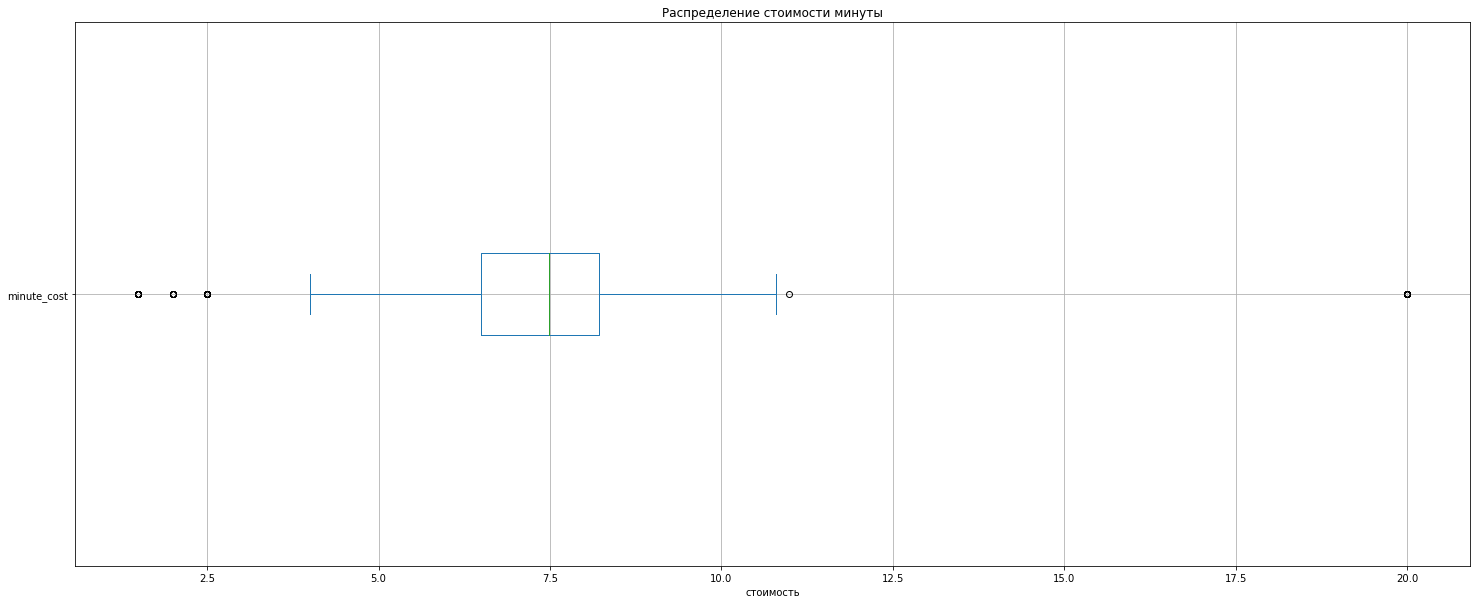

In [38]:
df['minute_cost'].plot(kind='box', vert=False, figsize=(25,10), grid=True)
plt.title('Распределение стоимости минуты')
plt.xlabel('стоимость')
plt.show()

In [39]:

display(df['minute_cost'].quantile(0.01))
display(df[df['minute_cost'] < df['minute_cost'].quantile(0.01)]['order_rk'].count())
display(df[df['minute_cost'] < df['minute_cost'].quantile(0.01)]['order_rk'].count() / df.shape[0])

display(df['minute_cost'].quantile(0.99))
display(df[df['minute_cost'] > df['minute_cost'].quantile(0.99)]['order_rk'].count())
display(df[df['minute_cost'] > df['minute_cost'].quantile(0.99)]['order_rk'].count() / df.shape[0])




4.99

71

0.0001806404339441185

9.99

3120

0.007938002167685207

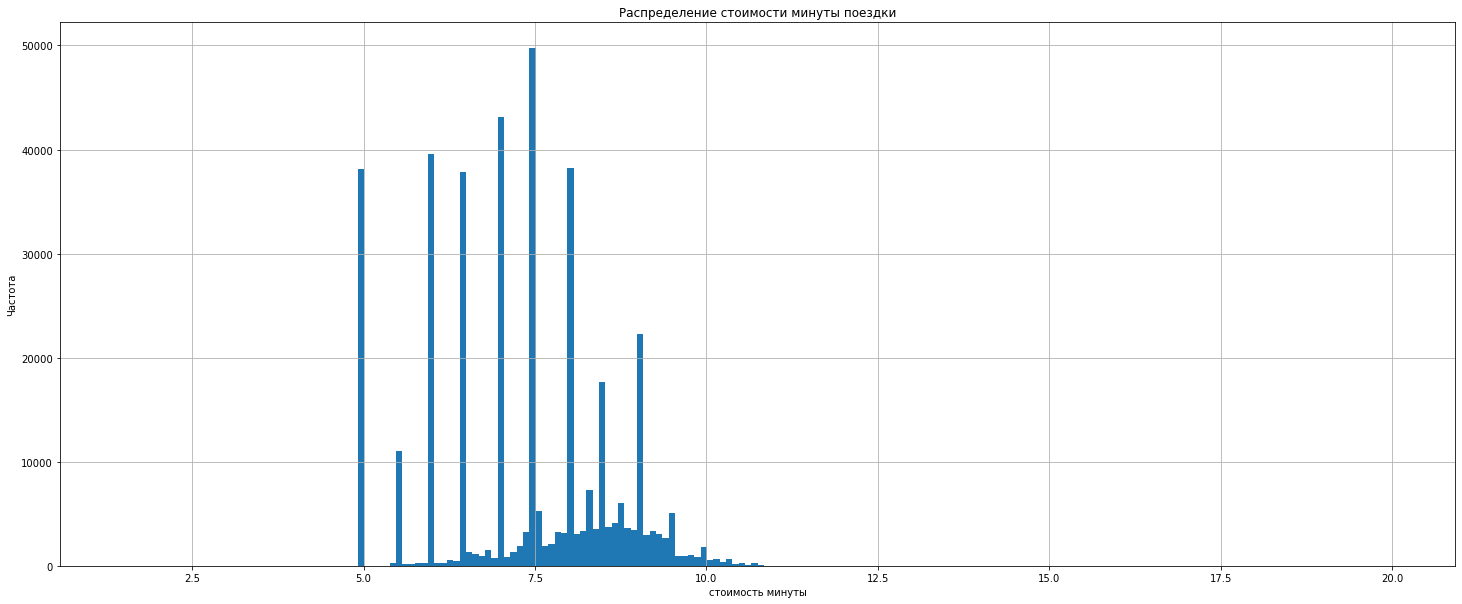

In [40]:
df['minute_cost'].hist(bins=200, figsize=(25,10))
plt.title('Распределение стоимости минуты поездки')
plt.xlabel('стоимость минуты')
plt.ylabel('Частота')
plt.show()

Наличие выбросов налицо. Идеально подойдет убрать аномально маленькие и анаомально большие значение по 1 и 99 квантилю, идеально кокнретно посмотреть что не так и можнт найти закномерность появления этих выбросов, но проще просто убрать

In [41]:
df = df[(df['minute_cost'] >= df['minute_cost'].quantile(0.01)) & (df['minute_cost'] <= df['minute_cost'].quantile(0.99))]

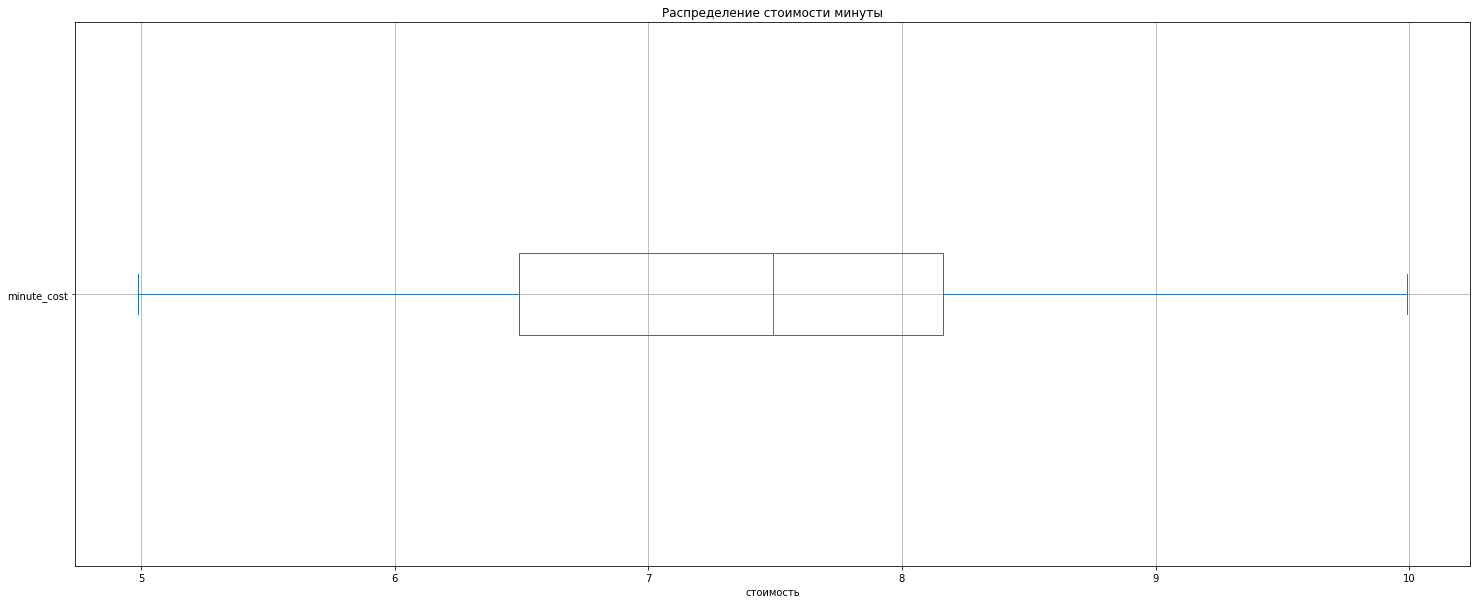

In [42]:
df['minute_cost'].plot(kind='box', vert=False, figsize=(25,10), grid=True)
plt.title('Распределение стоимости минуты')
plt.xlabel('стоимость')
plt.show()

In [43]:
display(df.info())
display(df_old.shape[0] - df.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389855 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 389855 non-null  int64  
 1   party_rk                 389855 non-null  int64  
 2   gender_cd                389855 non-null  object 
 3   age                      389855 non-null  int64  
 4   education_level_cd       389855 non-null  object 
 5   marital_status_cd        389855 non-null  object 
 6   lvn_state_nm             389855 non-null  object 
 7   minute_cost              389855 non-null  float64
 8   activation_cost          389855 non-null  float64
 9   hold_amount              389855 non-null  float64
 10  transport_model          389855 non-null  object 
 11  distance_km              389855 non-null  float64
 12  created_dttm             389855 non-null  object 
 13  book_start_dttm          389855 non-null  object 
 14  book

None

6894

К данному этапу всего удалено 6894 строки, на этом этапе 6894 - 3703 = 3191

#### activation_cost

In [44]:
display(df['activation_cost'].describe())

count    389855.000000
mean         42.539316
std          12.021342
min           0.000000
25%          30.000000
50%          50.000000
75%          50.000000
max          50.000000
Name: activation_cost, dtype: float64

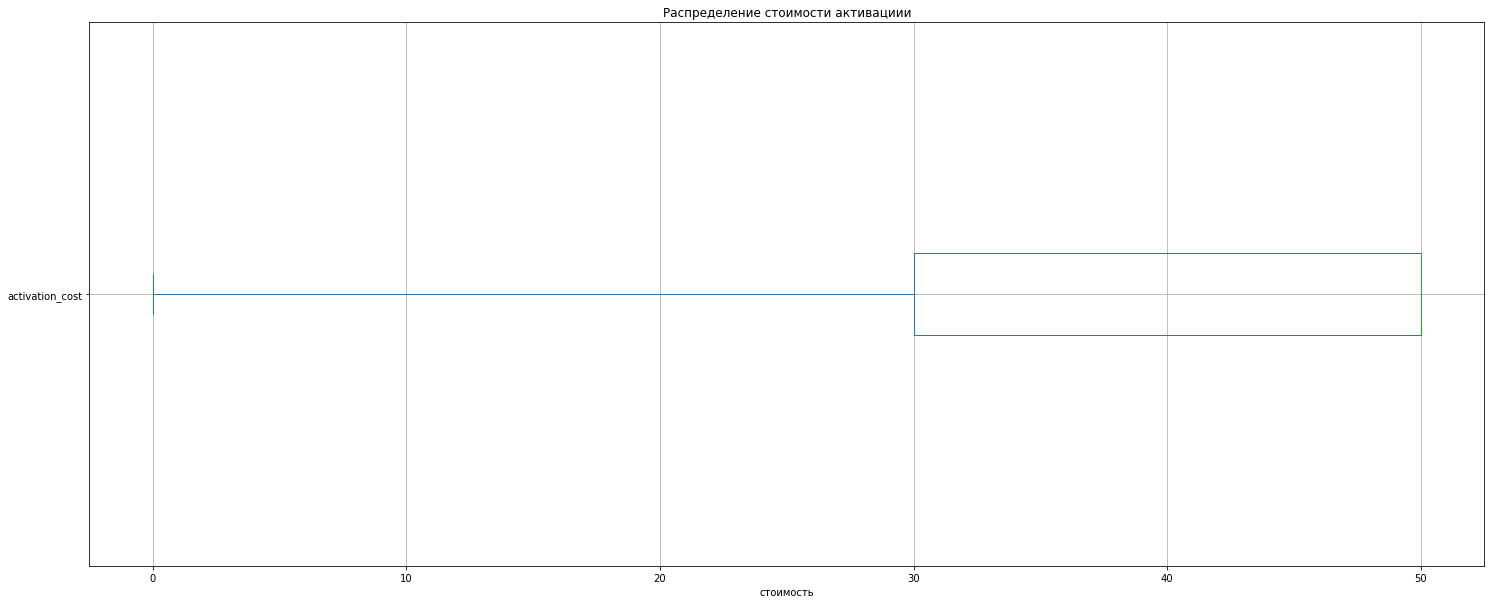

In [45]:
df['activation_cost'].plot(kind='box', vert=False, figsize=(25,10), grid=True)
plt.title('Распределение стоимости активациии')
plt.xlabel('стоимость')
plt.show()

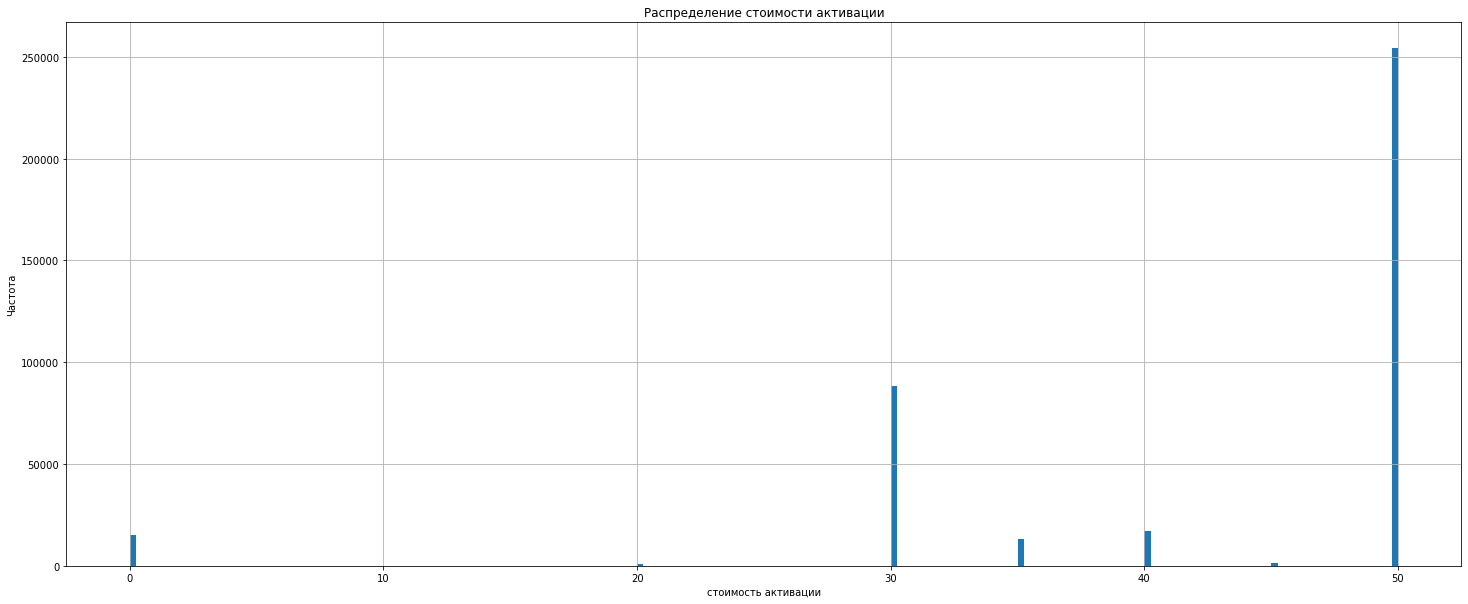

In [46]:
df['activation_cost'].hist(bins=200, figsize=(25,10))
plt.title('Распределение стоимости активации')
plt.xlabel('стоимость активации')
plt.ylabel('Частота')
plt.show()

In [47]:
display(df['activation_cost'].unique())

array([30., 50.,  0., 35., 40., 45., 20., 15.])

В целом здесь ничего необычного можно вообще рассматривать как категориальную переменную, которая веротянее всего связана с городом, может быть ввременем года и подпиской(про которую ничего не сказано, а может быть такой опции нет) Этот столбец очень важен, ведь порой большаяя часть стоимости аренды представлена этой суммой, как раз подписка и ее оформление либо снижает стоиммость старта либо делает его раввным нулю, что в свою очередь засталяет пользоввателся использовать самаокат снова через наш сервис.

#### hold_amount

In [48]:
display(df['hold_amount'].describe())

count    389855.000000
mean        300.000513
std           0.320316
min         300.000000
25%         300.000000
50%         300.000000
75%         300.000000
max         500.000000
Name: hold_amount, dtype: float64

In [49]:
display(df.groupby('hold_amount')['order_rk'].count())

hold_amount
300.0    389854
500.0         1
Name: order_rk, dtype: int64

Выброс лишь один удалим.

In [50]:
df = df[df['hold_amount'] != 500]
display(df.groupby('hold_amount')['order_rk'].count())

hold_amount
300.0    389854
Name: order_rk, dtype: int64

In [51]:
#display(df.info())
display(df_old.shape[0] - df.shape[0])

6895

На данном этапе удалена одна строка, всего удалено 6895

#### transport_model

In [52]:
display(df['transport_model'].unique())

array(['SL', 'E', 'ES100', 'Max', 'Urban E-Bike', 'ES400', 'ES', 'ES200',
       'ES-08S', 'Techno', 'MK', 'LB', 'B1D'], dtype=object)

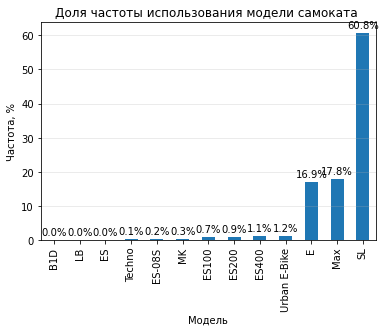

In [53]:
transport_model_share = (
    df.groupby('transport_model')['order_rk']
      .count()                              
      .div(df['order_rk'].count())          
      .mul(100)                               
      .sort_values()
)

ax = transport_model_share.plot(kind='bar', figsize=(6,4))

plt.title('Доля частоты использования модели самоката ')
plt.xlabel('Модель')
plt.ylabel('Частота, %')
plt.grid(axis='y', alpha=0.3)

ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge', padding=3)

plt.show()

Можно сразу заметить три самые распрострененные модели самокатов. Как не эксперт возомжно есть неявные дубликаты, но нет достатоной инфформации что бы объеденить возможно идентичные группы. Есть предположение что стоимость старта и минуты зависят от самоката (немного, более быстрые и новвые модели более дорогие), может некоторые модели корелируют с регионом, Мы не можем просто избавиться от информации моделей менее популрных(если убрать все, получится больше 5 процентов информации которую мы просто выкинем), оставим так как оно есть, однако если ввдруг нам будет необходимо провводить анализ в разрезе модели самоката, я бы оставил три самые популярныее модели, а для остального создал бы 4-ую категорию(на заметку)

#### distance_km

In [54]:
display(df['distance_km'].describe())

count    389854.000000
mean          3.698738
std         143.092888
min           0.000000
25%           0.942797
50%           1.733547
75%           3.068398
max       56012.640308
Name: distance_km, dtype: float64

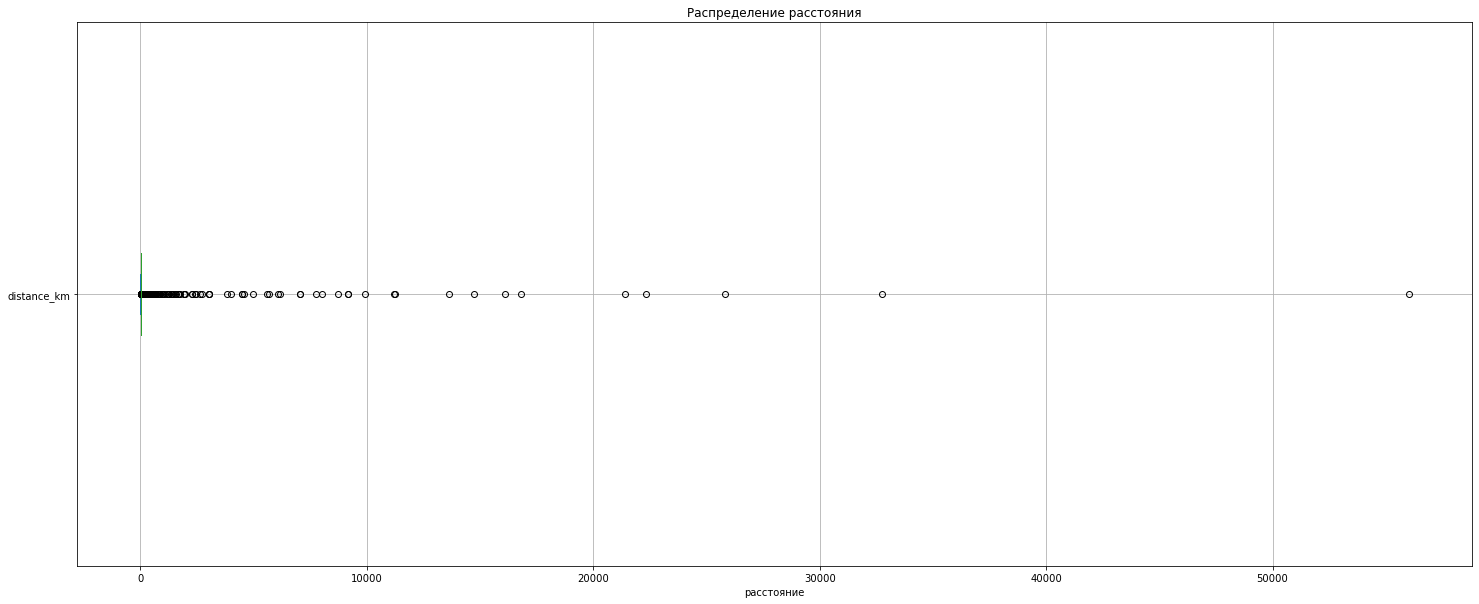

In [55]:
df['distance_km'].plot(kind='box', vert=False, figsize=(25,10), grid=True)
plt.title('Распределение расстояния')
plt.xlabel('расстояние')
plt.show()

In [56]:
display(df['distance_km'].quantile(0.01))
display(df[df['distance_km'] < df['distance_km'].quantile(0.01)]['order_rk'].count())
display(df[df['distance_km'] <=df['distance_km'].quantile(0.01)]['order_rk'].count() / df.shape[0])

display(df['distance_km'].quantile(0.91))
display(df[df['distance_km'] > df['distance_km'].quantile(0.99)]['order_rk'].count())
display(df[df['distance_km'] > df['distance_km'].quantile(0.99)]['order_rk'].count() / df.shape[0])

0.0

0

0.03101930466277119

5.439884630982668

3899

0.010001179928896459

In [57]:
display(df[(df['distance_km'] == 0 )& (df['nominal_price_rub_amt'] == 0)].head())
display(df[(df['distance_km'] == 0 )& (df['nominal_price_rub_amt'] == 0)]['order_rk'].count())

display(df[(df['distance_km'] == 0 )& (df['nominal_price_rub_amt'] != 0)].head())
display(df[df['distance_km'] != 0].sort_values('distance_km').head(5))

display(df[df['distance_km'] > df['distance_km'].quantile(0.999)].head(10))

display(df[df['distance_km'] == 0]['order_rk'].count())

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
26,266071242,313414522,M,24,UGR,UNM,ИРКУТСКАЯ,8.99,30.0,300.0,SL,0.0,2024-08-07 11:45:22.000000,2024-08-07 11:45:26.077578,2024-08-07 11:46:10.893866,8,2024-08-07 16:45:26.077578,0.0,0.0,0.0
57,264798748,32477259,M,33,GRD,UNM,МОСКВА,6.99,50.0,300.0,E,0.0,2024-08-02 08:34:34.000000,2024-08-02 08:34:38.057711,2024-08-02 08:35:14.438970,3,2024-08-02 08:34:38.057711,0.0,0.0,0.0
86,262311343,275000831,F,35,GRD,MAR,БЕЛГОРОДСКАЯ,6.99,50.0,300.0,E,0.0,2024-07-24 19:17:19.000000,2024-07-24 19:17:23.568347,2024-07-24 19:17:50.785998,3,2024-07-24 19:17:23.568347,0.0,0.0,0.0
144,270153833,744409018,M,40,GRD,CIV,НИЖЕГОРОДСКАЯ,4.99,50.0,300.0,E,0.0,2024-08-22 12:25:03.000000,2024-08-22 12:25:08.041864,2024-08-22 12:25:27.495422,3,2024-08-22 12:25:08.041864,0.0,0.0,0.0
196,343266292,777193432,M,22,UNKNOWN,CIV,КАЛИНИНГРАДСКАЯ,6.99,50.0,300.0,SL,0.0,2024-09-16 13:52:55.000000,2024-09-16 13:53:00.032000,2024-09-16 13:53:29.350015,2,2024-09-16 12:53:00.032000,0.0,0.0,0.0


4918

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
30,258644964,240562419,M,53,UNKNOWN,UNKNOWN,МОСКВА,6.99,50.0,300.0,SL,0.0,2024-07-10 20:18:18.000000,2024-07-10 20:18:21.195592,2024-07-10 20:19:27.899892,3,2024-07-10 20:18:21.195592,63.98,9.60,0.0
44,348290224,1015453216,M,40,GRD,DIV,ПСКОВСКАЯ,9.49,50.0,300.0,Max,0.0,2024-09-22 06:32:56.000000,2024-09-22 06:33:01.458000,2024-09-22 06:35:47.854393,11,2024-09-22 14:33:01.458000,78.47,7.85,0.0
50,268540300,843807184,M,19,UNKNOWN,UNKNOWN,МАРИЙ ЭЛ,6.99,30.0,300.0,Max,0.0,2024-08-16 12:04:45.000000,2024-08-16 12:04:48.123356,2024-08-16 12:05:42.393639,3,2024-08-16 12:04:48.123356,36.99,36.99,0.0
60,253949164,256051284,M,35,PGR,UNM,БЕЛГОРОДСКАЯ,6.99,30.0,300.0,ES,0.0,2024-06-22 19:15:43.000000,2024-06-22 19:15:46.548909,2024-06-22 19:18:36.611876,3,2024-06-22 19:15:46.548909,50.97,7.65,0.0
118,264796999,398041829,M,35,UNKNOWN,UNKNOWN,МОСКОВСКАЯ,5.99,30.0,300.0,SL,0.0,2024-08-02 16:50:18.000000,2024-08-02 16:50:21.955450,2024-08-02 16:51:34.953776,3,2024-08-02 16:50:21.955450,41.98,11.78,0.0


,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
316670,277399242,259416803,M,23,UNKNOWN,UNKNOWN,ЛЕНИНГРАДСКАЯ,6.51,50.0,300.0,SL,1.624713e-07,2024-09-10 19:23:55.000000,2024-09-10 19:23:58.217000,2024-09-10 19:24:55.741171,3,2024-09-10 19:23:58.217000,56.51,56.51,0.0
168763,266073297,1174399275,M,18,UNKNOWN,UNKNOWN,МОСКВА,7.78,50.0,300.0,SL,1.045083e-06,2024-08-07 07:43:43.000000,2024-08-07 07:43:47.254293,2024-08-07 07:44:43.423637,3,2024-08-07 07:43:47.254293,57.78,7.78,0.0
66301,332644981,615272208,M,19,UNKNOWN,UNM,САНКТ-ПЕТЕРБУРГ,7.99,50.0,300.0,SL,2.750634e-06,2024-09-15 15:06:33.000000,2024-09-15 15:06:36.760000,2024-09-15 15:08:03.145988,3,2024-09-15 15:06:36.760000,65.98,65.98,0.0
87266,256295661,291096709,M,27,GRD,UNM,МОСКОВСКАЯ,8.61,50.0,300.0,SL,1.276987e-05,2024-07-01 06:59:31.000000,2024-07-01 06:59:36.213666,2024-07-01 07:03:22.657101,3,2024-07-01 06:59:36.213666,84.44,8.44,0.0
127237,257630638,650113167,M,34,UNKNOWN,UNKNOWN,UNKNOWN,8.73,50.0,300.0,SL,1.675789e-05,2024-07-06 19:24:45.000000,2024-07-06 19:24:49.620392,2024-07-06 19:29:58.133078,3,2024-07-06 19:24:49.620392,102.38,15.36,0.0


,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
866,271245401,1024530479,M,46,UNKNOWN,UNKNOWN,UNKNOWN,7.61,50.0,300.0,SL,513.302545,2024-08-26 14:22:47.000000,2024-08-26 14:22:51.796736,2024-08-26 14:28:53.450982,3,2024-08-26 14:22:51.796736,95.66,38.26,0.0
1004,351562839,790167540,M,18,UNKNOWN,UNKNOWN,UNKNOWN,5.99,30.0,300.0,E,153.427751,2024-10-04 09:03:15.000000,2024-10-04 09:03:21.235000,2024-10-04 09:35:29.507063,5,2024-10-04 11:03:21.235000,227.67,22.77,0.0
1159,272072296,1015013799,M,40,GRD,MAR,МОСКОВСКАЯ,7.49,40.0,300.0,Max,68.236945,2024-08-29 19:57:26.000000,2024-08-29 19:57:28.875113,2024-08-29 20:40:14.755812,3,2024-08-29 19:57:28.875113,362.07,362.07,0.0
2446,353406264,1018191465,M,24,SCH,UNM,НИЖЕГОРОДСКАЯ,7.99,50.0,300.0,E,818.896127,2024-10-11 18:14:19.000000,2024-10-11 18:17:12.097000,2024-10-11 18:28:09.393008,3,2024-10-11 18:17:12.097000,137.89,75.36,0.0
6222,348287482,1188833286,F,20,UNKNOWN,UNKNOWN,МОСКВА,8.11,50.0,300.0,SL,285.109266,2024-09-22 16:28:28.000000,2024-09-22 16:28:33.530000,2024-09-22 16:53:41.833427,3,2024-09-22 16:28:33.530000,260.86,260.86,0.0
10419,332643712,1078173708,M,23,UNKNOWN,UNKNOWN,UNKNOWN,8.31,50.0,300.0,SL,63.815338,2024-09-15 11:34:54.000000,2024-09-15 11:34:58.482000,2024-09-15 15:46:54.997600,3,2024-09-15 11:34:58.482000,2144.12,2144.12,0.0
10637,260237132,376329991,M,41,UGR,CIV,МОСКОВСКАЯ,7.99,50.0,300.0,SL,59.666699,2024-07-16 14:00:20.000000,2024-07-16 14:00:24.078297,2024-07-16 14:07:08.246573,3,2024-07-16 14:00:24.078297,105.93,10.59,0.0
10670,252627977,546943941,M,40,GRD,MAR,МОСКОВСКАЯ,9.18,50.0,300.0,SL,3993.996075,2024-06-14 13:13:19.000000,2024-06-14 13:13:23.100722,2024-06-14 13:29:03.345699,3,2024-06-14 13:13:23.100722,196.88,39.00,0.0
11244,252634726,695658540,M,23,SCH,UNM,ЯРОСЛАВСКАЯ,4.99,30.0,300.0,SL,56012.640308,2024-06-09 00:01:35.000000,2024-06-09 00:01:38.297341,2024-06-09 00:17:38.340000,3,2024-06-09 00:01:38.297341,109.84,10.98,0.0
11625,263091258,363579535,M,43,GRD,MAR,МОСКОВСКАЯ,9.29,50.0,300.0,SL,485.519382,2024-07-27 15:08:47.000000,2024-07-27 15:08:50.244696,2024-07-27 15:11:52.911271,3,2024-07-27 15:08:50.244696,87.16,8.72,0.0


12093

Промежутоные выводы есть и их много. Причины будут быть разные от сбоев в геолокации 56000 км ну уж очень много, до нарушения работы датчика отдельно ввзятого самоката. Причем сложно определить ошибку рода вместо 56м написали 56км, ввсе поездки разные. В целом разумно отсеить данные по 99 квантилю

Также есть много нулевых значений 12093. Есть несколько идей почему может быть так. Бронируешь самокат, а он поломанный, никуда не едет деньги возввращаются через поддрежку 4918 таких заказов. Схожая идея но в поддержку не обращаешься. Или измерение расстояния происходит с ошибкой как в случае с очень большими расстояниями. Не понятно как считается это расстояние

Пока не понятно что делать с нулями, есть значения по типу 1.624713e-07 что тоже формально есть ноль. Отсеим по 99 квантилю. Значение 0 требует отдельного внимания через призму других столбцов


In [58]:
df = df[df['distance_km'] <= df['distance_km'].quantile(0.99)]

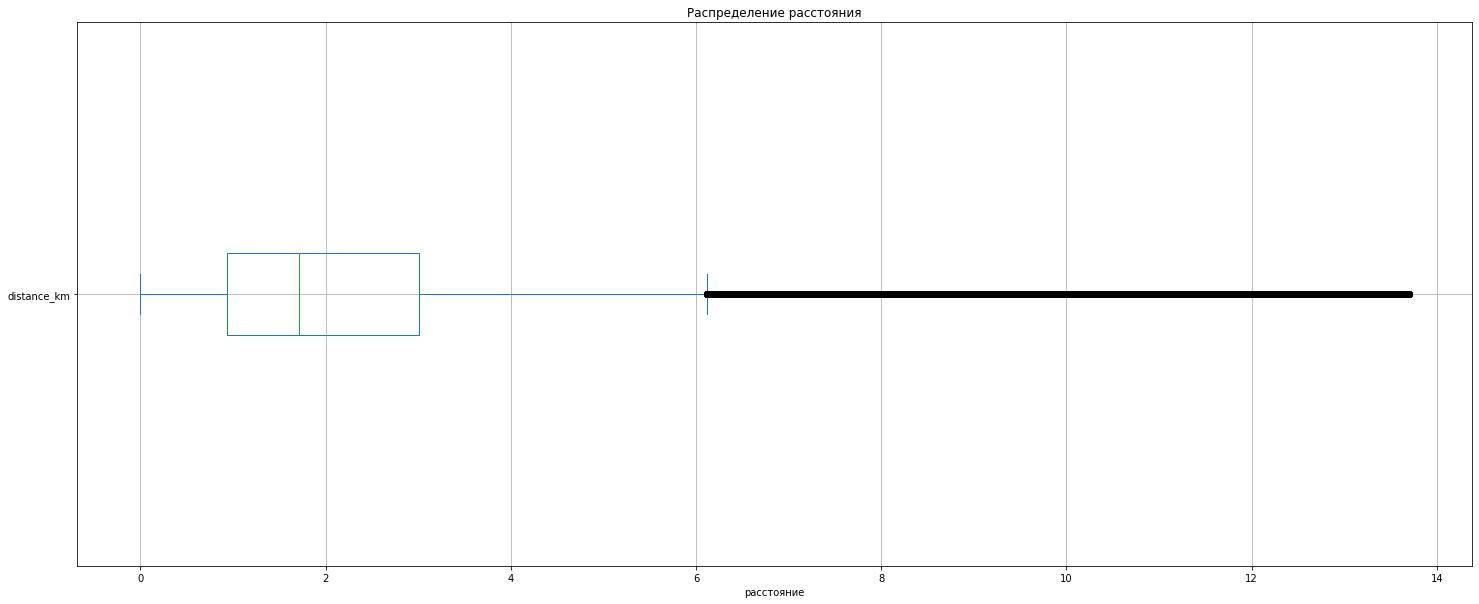

In [59]:
df['distance_km'].plot(kind='box', vert=False, figsize=(25,10), grid=True)
plt.title('Распределение расстояния')
plt.xlabel('расстояние')
plt.show()

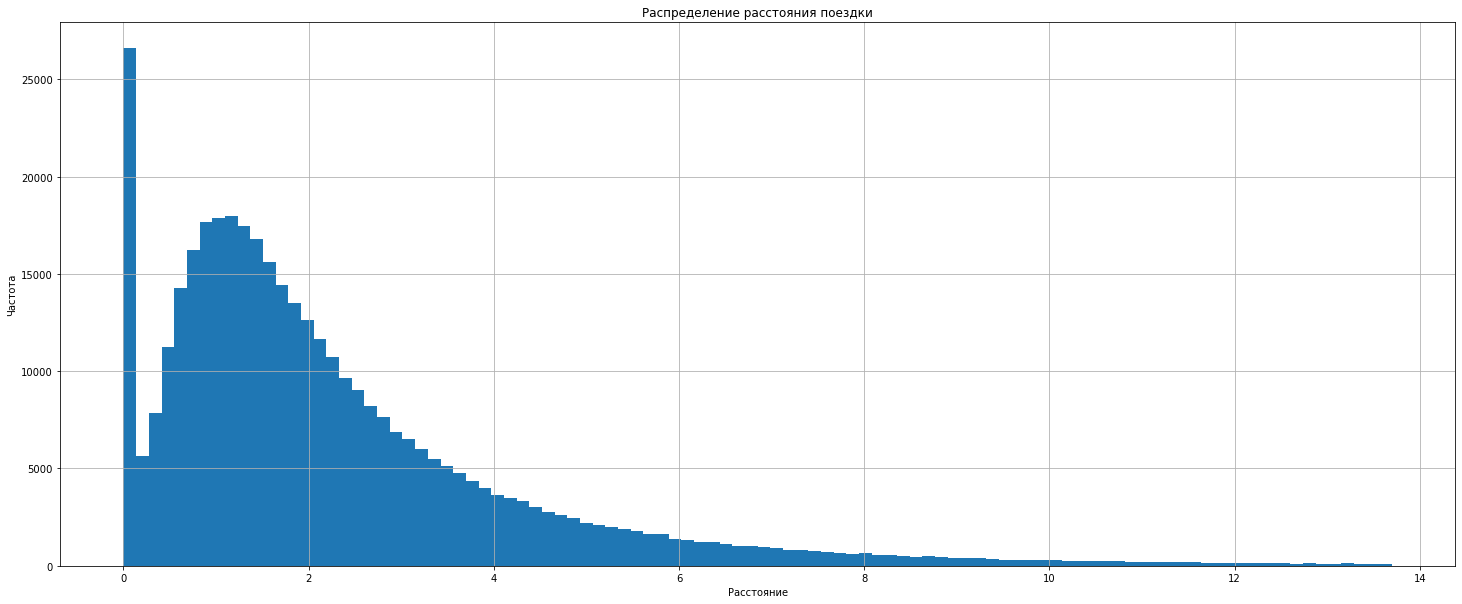

In [60]:
df['distance_km'].hist(bins=100, figsize=(25,10))
plt.title('Распределение расстояния поездки')
plt.xlabel('Расстояние')
plt.ylabel('Частота')
plt.show()

In [61]:
display(df.info())
display(df_old.shape[0] - df.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385955 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 385955 non-null  int64  
 1   party_rk                 385955 non-null  int64  
 2   gender_cd                385955 non-null  object 
 3   age                      385955 non-null  int64  
 4   education_level_cd       385955 non-null  object 
 5   marital_status_cd        385955 non-null  object 
 6   lvn_state_nm             385955 non-null  object 
 7   minute_cost              385955 non-null  float64
 8   activation_cost          385955 non-null  float64
 9   hold_amount              385955 non-null  float64
 10  transport_model          385955 non-null  object 
 11  distance_km              385955 non-null  float64
 12  created_dttm             385955 non-null  object 
 13  book_start_dttm          385955 non-null  object 
 14  book

None

10794

На даннй момент удалено 10794 строки, на данном этапе 3899

Хочется отметить что нулевые и около нулевые значения - это выбросы с точки зрения рядовой поездки, однако важный момент если речь идет о совершении операции аренды и в тоерии может пригодиться, оставим но дерржим в голове,Можно увидеть что остался хвост спрва, сильно резать данные не хочется пока, ведь в целом эти рассстояния имеют место быть, плюс по стоимости что-то тоже отсеится 

Пропустим пока столбцы содержащие дату и время, сначала нужно перевести их в нужный формат

#### book_time_zone_cd 

In [62]:
display(df['book_time_zone_cd'].unique())

array([ 5,  3,  7,  8,  6, 11,  2,  4, 10,  9, 12,  1,  0], dtype=int64)

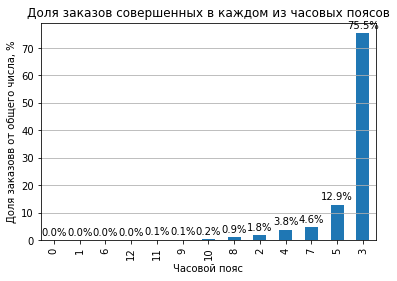

In [63]:
time_zone_share = (
    df.groupby('book_time_zone_cd')['order_rk']
      .count()
      .div(df['order_rk'].count())   
      .mul(100)                      
      .sort_values()
)

ax =time_zone_share.plot(kind='bar', figsize=(6,4))

plt.title('Доля заказов совершенных в каждом из часовых поясов')
plt.xlabel('Часовой пояс')
plt.ylabel('Доля заказовв от общего числа, %')
plt.grid(axis='y')

ax.bar_label(ax.containers[0], fmt='%.1f%%', label_type='edge', padding=3)

plt.show()

Все еще до конца непонятно к чему относися часовой пояс, в описании это лишь часовой пояс, следом идет описание следующего столбца `Дата и время начала поездки в часовом поясе человека,который брал самокат`, однако это больше относится к заказу нежели к человеку, ибо (наша таблица построена на соединении двух о заказах и дополнена информацией о пользователях из отдельной таблицы) пропусков не было, и если вернутся к странным местам жительства часовой пояс не совпадал со странныым местом, оставим только 2,4,7,5,3 часовыые пояса как самые популярные

In [64]:
display(df[~df['book_time_zone_cd'].isin([3, 5, 7, 4, 2])]['order_rk'].count() / df.shape[0])

0.013726988897669417

In [65]:
df = df[df['book_time_zone_cd'].isin([3, 5, 7, 4, 2])]

In [66]:
display(df.info())
display(df_old.shape[0] - df.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380657 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 380657 non-null  int64  
 1   party_rk                 380657 non-null  int64  
 2   gender_cd                380657 non-null  object 
 3   age                      380657 non-null  int64  
 4   education_level_cd       380657 non-null  object 
 5   marital_status_cd        380657 non-null  object 
 6   lvn_state_nm             380657 non-null  object 
 7   minute_cost              380657 non-null  float64
 8   activation_cost          380657 non-null  float64
 9   hold_amount              380657 non-null  float64
 10  transport_model          380657 non-null  object 
 11  distance_km              380657 non-null  float64
 12  created_dttm             380657 non-null  object 
 13  book_start_dttm          380657 non-null  object 
 14  book

None

16092

На данном этапе отфильтровнао 16092 строки, на этом этапе 5298

In [67]:
display(np.sort(df['lvn_state_nm' ].unique()))

array(['ISRAEL', 'UNKNOWN', 'АДЫГЕЯ', 'АЛТАЙ', 'АМУРСКАЯ',
       'АРХАНГЕЛЬСКАЯ', 'АСТРАХАНСКАЯ', 'БАЙКОНУР', 'БАШКОРТОСТАН',
       'БЕЛГОРОДСКАЯ', 'БРЕСТСКАЯ', 'БРЯНСКАЯ', 'БУРЯТИЯ', 'ВЛАДИМИРСКАЯ',
       'ВОЛГОГРАДСКАЯ', 'ВОЛОГОДСКАЯ', 'ВОРОНЕЖСКАЯ', 'ГОМЕЛЬСКАЯ',
       'ДАГЕСТАН', 'ДНР', 'ЕВРЕЙСКАЯ АО', 'ЗАБАЙКАЛЬСКИЙ', 'ЗАПОРОЖСКАЯ',
       'ЗЕЛЕНОГРАД', 'ИВАНОВСКАЯ', 'ИНГУШЕТИЯ', 'ИРКУТСКАЯ',
       'КАБАРДИНО-БАЛКАРСКАЯ', 'КАЛИНИНГРАДСКАЯ', 'КАЛМЫКИЯ', 'КАЛУЖСКАЯ',
       'КАМЧАТСКИЙ', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'КАРЕЛИЯ', 'КЕМЕРОВСКАЯ',
       'КИРОВСКАЯ', 'КОМИ', 'КОСТРОМСКАЯ', 'КРАСНОДАРСКИЙ',
       'КРАСНОЯРСКИЙ', 'КРЫМ', 'КУРГАНСКАЯ', 'КУРСКАЯ', 'ЛЕНИНГРАДСКАЯ',
       'ЛИПЕЦКАЯ', 'ЛНР', 'МАГАДАНСКАЯ', 'МАРИЙ ЭЛ', 'МО ЗАПАД',
       'МОГИЛЕВСКАЯ', 'МОРДОВИЯ', 'МОСКВА', 'МОСКОВСКАЯ', 'МУРМАНСКАЯ',
       'НЕНЕЦКИЙ', 'НИЖЕГОРОДСКАЯ', 'НОВГОРОДСКАЯ', 'НОВОЗЫБКОВСКАЯ',
       'НОВОСИБИРСКАЯ', 'ОДЕССКАЯ', 'ОМСКАЯ', 'ОРЕНБУРГСКАЯ', 'ОРЛОВСКАЯ',
       'ПЕНЗЕНСКАЯ', 'ПЕРМСКИЙ', '

In [68]:
display(df.groupby('lvn_state_nm')['party_rk'].nunique().sort_values().tail(70))

lvn_state_nm
ДНР                   64
ЗАБАЙКАЛЬСКИЙ         72
КУРСКАЯ               77
ПРИМОРСКИЙ            91
ОРЛОВСКАЯ             92
                   ...  
СВЕРДЛОВСКАЯ        3240
САНКТ-ПЕТЕРБУРГ     5511
UNKNOWN             5769
МОСКОВСКАЯ          6086
МОСКВА             11805
Name: party_rk, Length: 70, dtype: int64

Да теория о не связности вмеру состоятельная. Остался к примеру приморский край хотя этот часовой пояс мы убрали. это строка характеризует скорее место регистрации, а не фактическое место пребывание где и происходит использование самоката (хотя зачастую такие метса совпадают)

#### nominal_price_rub_amt

In [69]:
display(df['nominal_price_rub_amt'].describe())

count    380657.000000
mean        123.003720
std          82.258952
min           0.000000
25%          79.960000
50%         102.910000
75%         139.900000
max        4362.830000
Name: nominal_price_rub_amt, dtype: float64

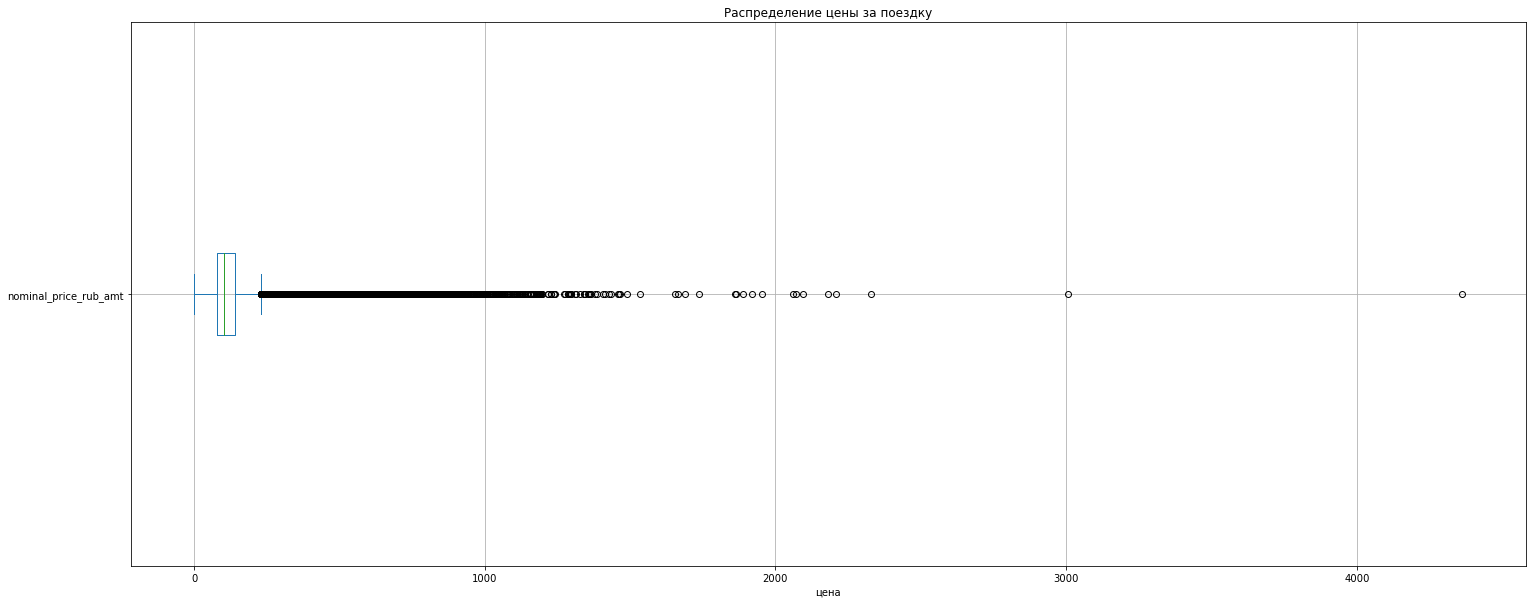

In [70]:
df['nominal_price_rub_amt'].plot(kind='box', vert=False, figsize=(25,10), grid=True)
plt.title('Распределение цены за поездку')
plt.xlabel('цена')
plt.show()

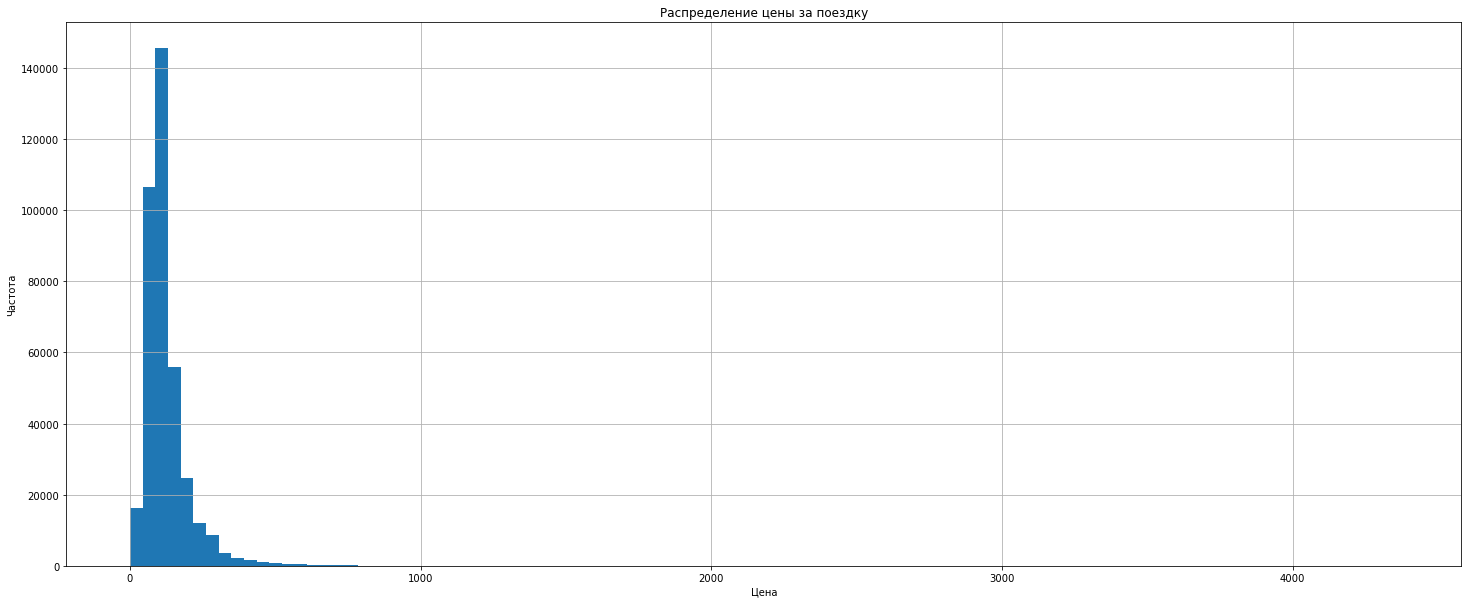

In [71]:
df['nominal_price_rub_amt'].hist(bins=100, figsize=(25,10))
plt.title('Распределение цены за поездку')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

In [72]:
display(df['nominal_price_rub_amt'].quantile(0.01))
display(df[df['nominal_price_rub_amt'] < df['nominal_price_rub_amt'].quantile(0.01)]['order_rk'].count())
display(df[df['nominal_price_rub_amt'] < df['nominal_price_rub_amt'].quantile(0.01)]['order_rk'].count() / df.shape[0])

display(df['nominal_price_rub_amt'].quantile(0.99))
display(df[df['nominal_price_rub_amt'] > df['nominal_price_rub_amt'].quantile(0.99)]['order_rk'].count())
display(df[df['nominal_price_rub_amt'] > df['nominal_price_rub_amt'].quantile(0.99)]['order_rk'].count() / df.shape[0])

0.0

0

0.0

449.47

3806

0.009998502588944903

Выбросы очевидно есть. Как было отмечено ранее (пункт про растояние) есть множетво некикх поездок с нулевой дистанцией и ценой, мы абсолютно точноубираем хвосты по 99 квантилю

In [73]:
df = df[df['nominal_price_rub_amt'] <= df['nominal_price_rub_amt'].quantile(0.99)]

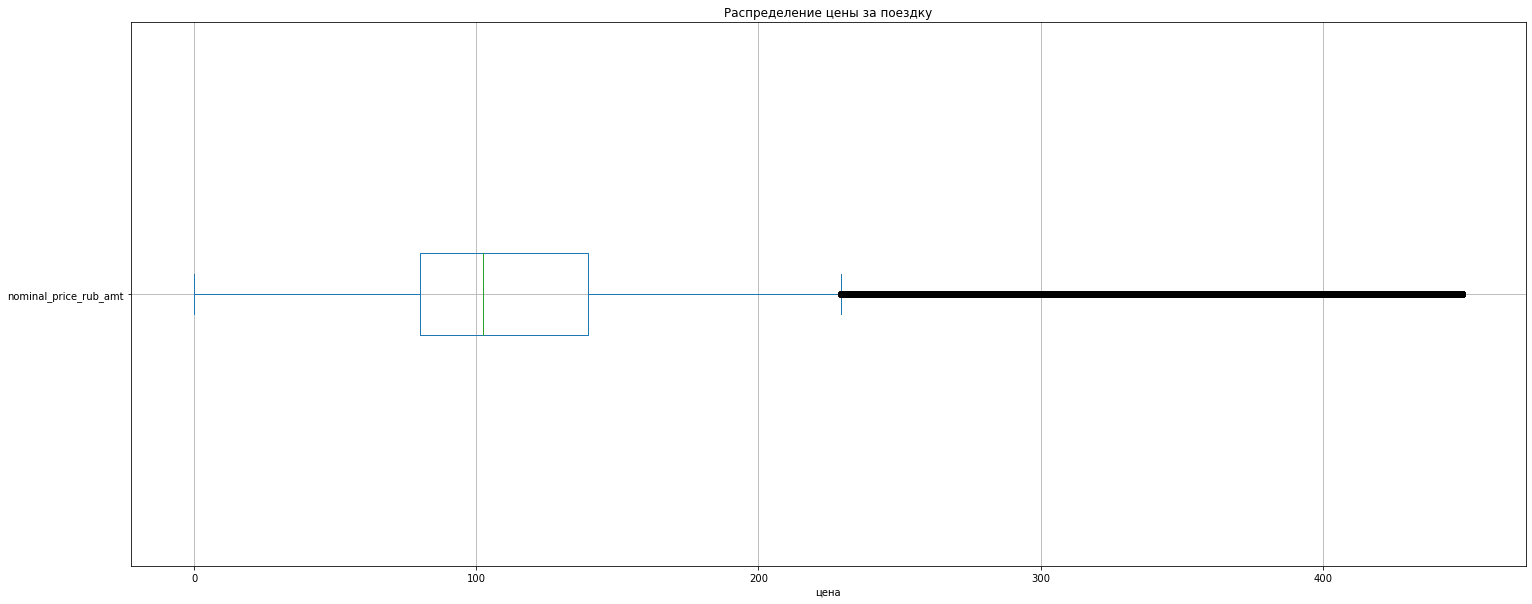

In [74]:
df['nominal_price_rub_amt'].plot(kind='box', vert=False, figsize=(25,10), grid=True)
plt.title('Распределение цены за поездку')
plt.xlabel('цена')
plt.show()

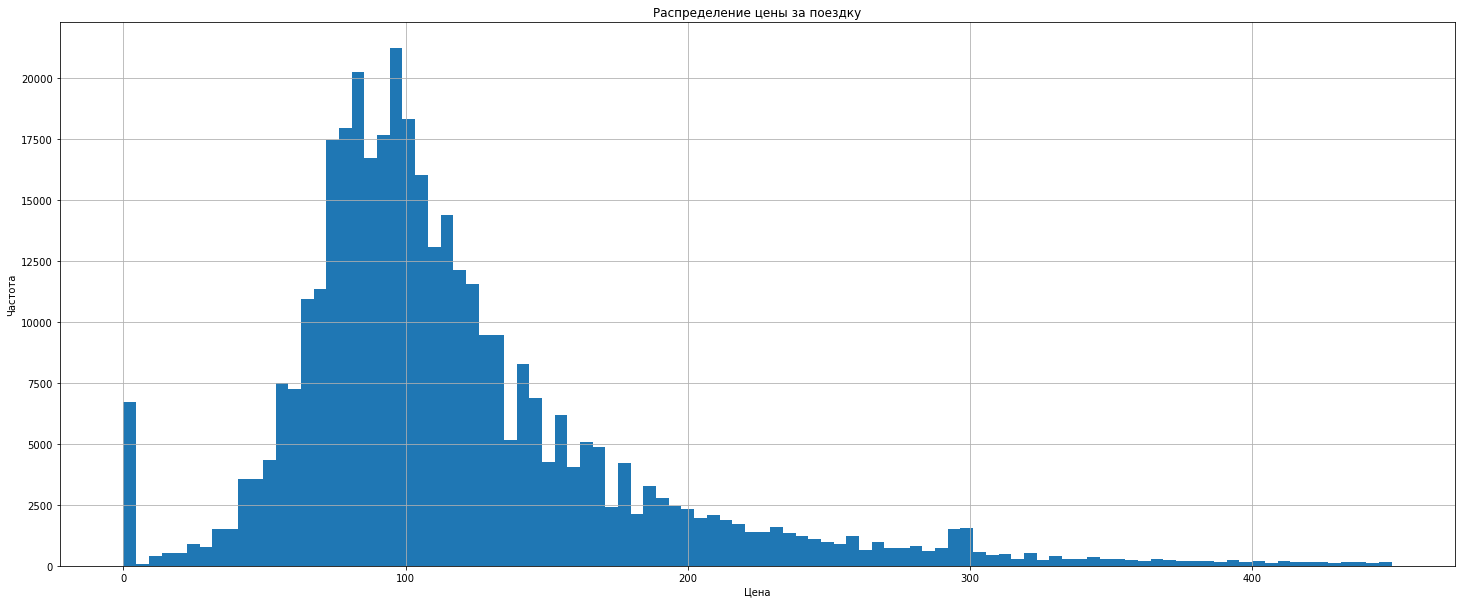

In [75]:
df['nominal_price_rub_amt'].hist(bins=100, figsize=(25,10))
plt.title('Распределение цены за поездку')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

In [76]:
display(df[(df['distance_km'] == 0 )& (df['nominal_price_rub_amt'] == 0)]['order_rk'].count())
display(df[(df['distance_km'] != 0 )& (df['nominal_price_rub_amt'] == 0)]['order_rk'].count())
display(df[(df['nominal_price_rub_amt'] == 0)]['order_rk'].count())

4841

1866

6707

In [77]:
display(df[(df['distance_km'] != 0 )& (df['nominal_price_rub_amt'] == 0)].head())

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
5,277397094,5247768,M,42,UNKNOWN,UNKNOWN,МОСКВА,7.49,50.0,300.0,SL,0.016090,2024-09-10 09:40:18.000000,2024-09-10 09:40:24.036000,2024-09-10 09:41:03.644495,3,2024-09-10 09:40:24.036000,0.0,0.0,0.0
204,266070888,566633835,M,21,SCH,UNM,НОВОСИБИРСКАЯ,5.99,30.0,300.0,E,0.018940,2024-08-07 11:13:26.000000,2024-08-07 11:13:30.929442,2024-08-07 11:14:12.603469,7,2024-08-07 15:13:30.929442,0.0,0.0,0.0
473,267911984,696784430,M,19,UNKNOWN,UNKNOWN,СВЕРДЛОВСКАЯ,6.49,30.0,300.0,E,0.013480,2024-08-14 12:36:43.000000,2024-08-14 12:36:47.818470,2024-08-14 12:37:28.687698,5,2024-08-14 14:36:47.818470,0.0,0.0,0.0
495,265061470,428462259,M,31,UNKNOWN,UNKNOWN,МОСКОВСКАЯ,6.99,50.0,300.0,E,0.001014,2024-08-03 09:27:40.000000,2024-08-03 09:27:44.662344,2024-08-03 09:28:24.894117,3,2024-08-03 09:27:44.662344,0.0,0.0,0.0
747,323921834,861261889,M,32,GRD,UNM,НИЖЕГОРОДСКАЯ,8.29,50.0,300.0,E,0.017711,2024-09-14 16:38:58.000000,2024-09-14 16:39:00.592000,2024-09-14 16:40:29.928630,3,2024-09-14 16:39:00.592000,0.0,0.0,0.0


In [78]:
display(df[(df['distance_km'] <= 1 )& (df['nominal_price_rub_amt'] == 0)]['order_rk'].count())
display(df[(df['distance_km'] <= 0.1 )& (df['nominal_price_rub_amt'] == 0)]['order_rk'].count())
display(df[(df['distance_km'] <= 0.01 )& (df['nominal_price_rub_amt'] == 0)]['order_rk'].count())

6700

6557

5520

In [79]:
display(df[(df['distance_km'] > 1 )& (df['nominal_price_rub_amt'] == 0)].head())

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
170259,356251651,772708557,M,22,SCH,UNM,МОСКВА,9.61,50.0,300.0,SL,10.984314,2024-10-21 05:20:48.000000,2024-10-21 05:20:51.860000,2024-10-21 05:21:22.192242,3,2024-10-21 05:20:51.860000,0.0,0.0,0.0
185245,268196081,1172208441,M,24,UNKNOWN,CIV,СВЕРДЛОВСКАЯ,4.99,30.0,300.0,SL,1.373369,2024-08-15 12:50:48.000000,2024-08-15 12:50:50.747296,2024-08-15 12:51:32.772615,3,2024-08-15 12:50:50.747296,0.0,0.0,0.0
206257,263338213,152864970,M,30,GRD,UNM,СВЕРДЛОВСКАЯ,8.77,50.0,300.0,SL,1.124179,2024-07-28 14:20:38.000000,2024-07-28 14:20:41.183071,2024-07-28 14:21:00.298668,3,2024-07-28 14:20:41.183071,0.0,0.0,0.0
284641,261055138,1167615466,M,39,UNKNOWN,UNKNOWN,СМОЛЕНСКАЯ,6.99,40.0,300.0,Max,1.288677,2024-07-19 06:21:59.000000,2024-07-19 06:22:04.448018,2024-07-19 06:23:02.241287,3,2024-07-19 06:22:04.448018,0.0,0.0,0.0
314043,258137504,398333760,M,22,UNKNOWN,UNKNOWN,ЧЕЛЯБИНСКАЯ,4.99,0.0,300.0,Max,2.249599,2024-07-08 10:43:31.000000,2024-07-08 10:43:35.764151,2024-07-08 10:44:00.897071,3,2024-07-08 10:43:35.764151,0.0,0.0,0.0


С тоочки зрения полноценной поездки, эти данные выбросы. Однако эти данные нельзя убирать. Эти данные могут в анализе пользовательского поведения. Монжо заметить что все поездки с нулевой стоимостью имеют маленькое время использования самоката, зачастую малленькую дистанцию (кроме выбросов, при неверной оценки дистанции пройденой самокатом) их можно трактовать как не успешную попытку(можно проввести отдельное исследование), однако этот опыт может отолкнуть пользователей от использования продукта, нужно сделать так чтобы при столкноввении с ошибкой или неисправностью самоката (как идея гипотезы) пользователь снова воспользоввался нашим сервисом.

ГИПОТЕЗА: 
Если клиент сталкивается с неисправным самокатом во время аренды, то это негативно влияет на его дальнейшую активность и повышает отток. Предполагается, что предоставление промокода на следующую бесплатную поездку при такой ситуации позволит снизить отток и повысить лояльность пользователей.

Метрики для проверки гипотезы:
Целвевая - Retention: доля пользователей, вернувшихся в сервис в течение 1/7/30 дней после инцидента.

Churn rate: доля пользователей, переставших пользоваться сервисом после столкновения с неисправностью.

Использование промокода: доля пользователей, активировавших предоставленный бонус.

Повторные поездки: количество поездок после инцидента с промокодом vs. без промокода.

Я бы сказал что эта гипотеза может быть развита, в целом создание системы отработки негативных ситуаций

#### loyalty_accrual_rub_amt and loyalty_accrual_bns_amt

In [80]:
display(df['loyalty_accrual_rub_amt'].describe())

count    376851.000000
mean         29.955637
std          43.250307
min         -65.290000
25%           9.750000
50%          16.890000
75%          31.370000
max         659.510000
Name: loyalty_accrual_rub_amt, dtype: float64

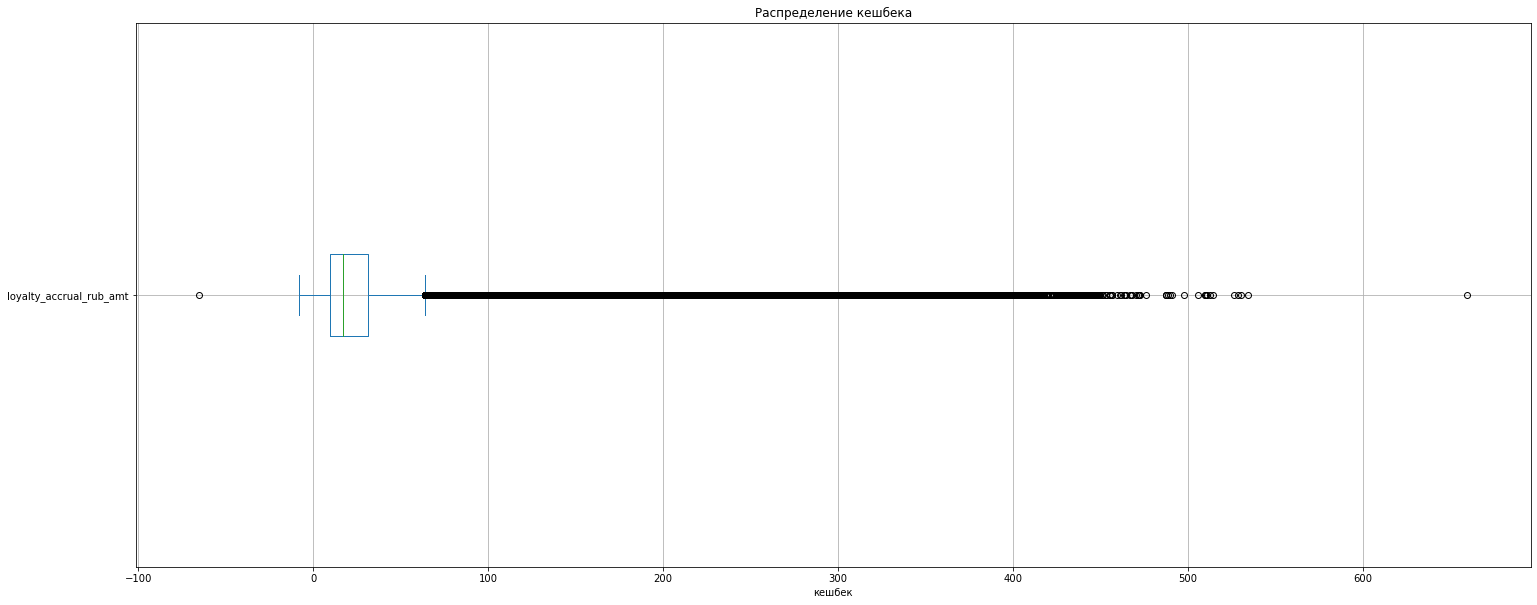

In [81]:
df['loyalty_accrual_rub_amt'].plot(kind='box', vert=False, figsize=(25,10), grid=True)
plt.title('Распределение кешбека')
plt.xlabel('кешбек')
plt.show()

In [82]:
df.sort_values('loyalty_accrual_rub_amt').head(10)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
272310,348557969,904357431,M,18,GRD,UNM,КРАСНОЯРСКИЙ,6.49,0.0,300.0,SL,3.125962,2024-09-23 15:15:20.000000,2024-09-23 15:15:26.060000,2024-09-23 16:07:48.379234,7,2024-09-23 19:15:26.060000,343.97,-65.29,0.0
225743,263337728,544337483,M,22,UNKNOWN,UNKNOWN,МОСКВА,8.86,50.0,300.0,SL,13.229882,2024-07-28 15:43:29.000000,2024-07-28 15:43:31.515713,2024-07-28 16:10:19.203000,3,2024-07-28 15:43:31.515713,289.22,-8.08,0.0
299220,351047641,759332373,M,27,GRD,UNM,САНКТ-ПЕТЕРБУРГ,7.99,50.0,300.0,SL,0.467784,2024-10-01 22:19:00.000000,2024-10-01 22:19:05.461000,2024-10-01 22:22:58.094771,3,2024-10-01 22:19:05.461000,81.96,-5.00,0.0
265501,268196141,861257044,M,20,UGR,UNM,СТАВРОПОЛЬСКИЙ,7.99,50.0,300.0,Max,0.270889,2024-08-15 21:14:13.000000,2024-08-15 21:14:17.467690,2024-08-15 21:18:38.519055,3,2024-08-15 21:14:17.467690,89.95,0.00,0.0
101141,252616080,1059610403,M,27,UNKNOWN,UNKNOWN,UNKNOWN,6.99,0.0,300.0,ES400,0.024376,2024-06-07 11:54:27.000000,2024-06-07 11:54:30.724265,2024-06-07 11:55:11.807645,3,2024-06-07 11:54:30.724265,0.00,0.00,0.0
26581,252624935,163661098,M,34,GRD,MAR,САНКТ-ПЕТЕРБУРГ,5.99,0.0,300.0,SL,0.000000,2024-06-12 10:42:53.000000,2024-06-12 10:42:57.301393,2024-06-12 10:43:34.289557,3,2024-06-12 10:42:57.301393,0.00,0.00,0.0
101146,266324259,287522466,M,34,UGR,CIV,МОСКОВСКАЯ,8.99,50.0,300.0,MK,0.971107,2024-08-08 15:03:23.000000,2024-08-08 15:03:26.888258,2024-08-08 15:07:55.897533,3,2024-08-08 15:03:26.888258,94.95,0.00,59.0
281041,260238457,507619153,M,45,GRD,DIV,СВЕРДЛОВСКАЯ,6.49,30.0,300.0,E,0.023111,2024-07-16 13:20:06.000000,2024-07-16 13:20:10.755728,2024-07-16 13:21:12.255881,5,2024-07-16 15:20:10.755728,0.00,0.00,0.0
281036,252637140,746834196,M,20,UNKNOWN,UNKNOWN,САНКТ-ПЕТЕРБУРГ,5.99,0.0,300.0,SL,3.030775,2024-06-10 11:34:21.000000,2024-06-10 11:34:24.965161,2024-06-10 11:45:25.937687,3,2024-06-10 11:34:24.965161,65.89,0.00,6.0
101165,272728204,211679,M,38,SCH,MAR,МАРИЙ ЭЛ,7.99,30.0,300.0,SL,0.016471,2024-08-31 14:52:04.000000,2024-08-31 14:52:07.291135,2024-08-31 14:52:45.224594,3,2024-08-31 14:52:07.291135,0.00,0.00,0.0


In [83]:
df.sort_values('loyalty_accrual_rub_amt').tail(10)

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
170030,268815350,1021749703,M,28,UNKNOWN,UNKNOWN,UNKNOWN,5.99,30.0,300.0,E,8.518055,2024-08-17 15:54:09.000000,2024-08-17 15:54:13.330963,2024-08-17 17:02:55.156402,7,2024-08-17 19:54:13.330963,443.31,509.80,0.0
235774,268543577,31004027,F,38,GRD,MAR,МОСКВА,8.16,50.0,300.0,SL,3.332386,2024-08-16 10:04:41.000000,2024-08-16 10:04:43.874374,2024-08-16 10:50:35.714734,3,2024-08-16 10:04:43.874374,425.36,510.16,0.0
95270,267912646,1142769364,M,18,UNKNOWN,UNKNOWN,UNKNOWN,4.99,50.0,300.0,E,9.289900,2024-08-14 14:48:23.000000,2024-08-14 14:48:26.405646,2024-08-14 16:06:55.418866,5,2024-08-14 16:48:26.405646,444.21,510.85,0.0
33905,269622869,758826363,M,41,UNKNOWN,UNKNOWN,МОСКОВСКАЯ,6.99,50.0,300.0,SL,6.246808,2024-08-20 14:49:26.000000,2024-08-20 14:49:30.089741,2024-08-20 15:42:46.721158,3,2024-08-20 14:49:30.089741,427.46,512.58,0.0
167838,269362727,308416137,F,35,UNKNOWN,UNKNOWN,САНКТ-ПЕТЕРБУРГ,7.49,50.0,300.0,SL,7.740789,2024-08-19 18:44:33.000000,2024-08-19 18:44:37.285026,2024-08-19 19:36:59.088079,3,2024-08-19 18:44:37.285026,446.97,514.02,0.0
160086,268818790,1168654022,M,37,UNKNOWN,UNKNOWN,UNKNOWN,7.49,50.0,300.0,SL,13.561456,2024-08-17 12:35:27.000000,2024-08-17 12:35:32.455890,2024-08-17 13:27:03.000674,3,2024-08-17 12:35:32.455890,439.48,526.41,0.0
115901,268817533,527122776,M,26,UNKNOWN,UNKNOWN,СТАВРОПОЛЬСКИЙ,8.49,50.0,300.0,ES100,5.433546,2024-08-17 14:51:23.000000,2024-08-17 14:51:26.605460,2024-08-17 15:37:01.158972,3,2024-08-17 14:51:26.605460,440.54,528.62,0.0
190668,269886934,269232244,M,31,SCH,CIV,ХАНТЫ-МАНСИЙСКИЙ - ЮГРА,7.00,50.0,300.0,SL,5.324135,2024-08-21 17:39:57.000000,2024-08-21 17:40:00.242604,2024-08-21 18:35:07.936627,3,2024-08-21 17:40:00.242604,442.00,530.30,0.0
290086,268542157,1072772014,M,37,GRD,MAR,ЧЕЛЯБИНСКАЯ,6.49,30.0,300.0,E,10.627088,2024-08-16 16:34:07.000000,2024-08-16 16:34:11.292764,2024-08-16 17:38:01.330666,5,2024-08-16 18:34:11.292764,445.36,534.16,0.0
285730,348556381,270288372,M,39,UNKNOWN,UNKNOWN,МОСКВА,7.99,50.0,300.0,SL,7.705214,2024-09-23 15:52:41.000000,2024-09-23 15:52:45.604000,2024-09-23 16:41:03.886272,3,2024-09-23 15:52:45.604000,441.51,659.51,0.0


In [84]:
display(df[df['loyalty_accrual_rub_amt'] >= df['nominal_price_rub_amt']]['order_rk'].count())
display(df[df['loyalty_accrual_rub_amt'] > 0]['order_rk'].count())

32024

348576

In [85]:
display(df['loyalty_accrual_bns_amt'].describe())

count    376851.000000
mean          6.364733
std          62.026350
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        6333.333380
Name: loyalty_accrual_bns_amt, dtype: float64

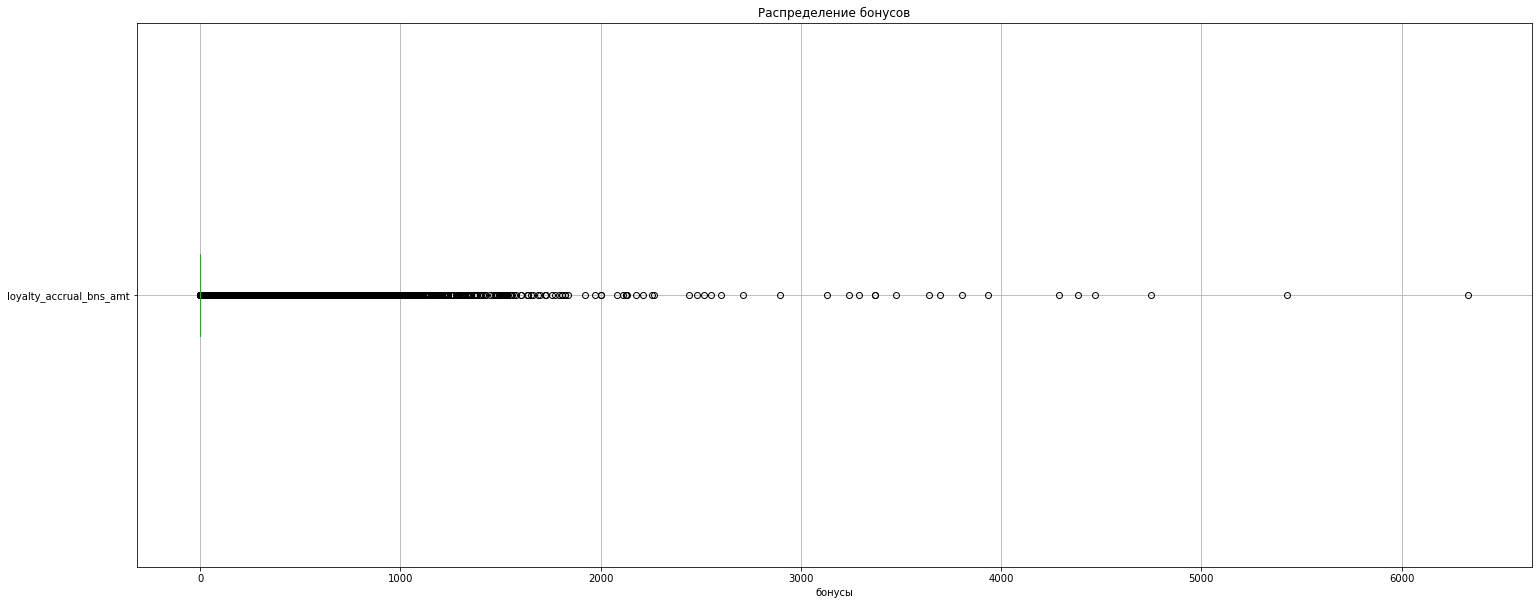

In [86]:
df['loyalty_accrual_bns_amt'].plot(kind='box', vert=False, figsize=(25,10), grid=True)
plt.title('Распределение бонусов')
plt.xlabel('бонусы')
plt.show()

In [87]:
display(df.sort_values('loyalty_accrual_bns_amt').head(10))
display(df.sort_values('loyalty_accrual_bns_amt').tail(10))

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,0.0
260898,273528114,753024198,M,45,UNKNOWN,UNM,ТОМСКАЯ,5.99,30.0,300.0,SL,1.869519,2024-09-03 10:02:51.000000,2024-09-03 10:02:55.592307,2024-09-03 10:09:44.445732,7,2024-09-03 14:02:55.592307,71.93,21.58,0.0
260896,271246458,902461432,M,22,GRD,UNM,БАШКОРТОСТАН,6.99,50.0,300.0,SL,2.529869,2024-08-26 10:22:06.000000,2024-08-26 10:22:10.623750,2024-08-26 10:27:36.445482,3,2024-08-26 10:22:10.623750,91.94,9.19,0.0
260895,271246453,1176660182,M,21,UNKNOWN,UNKNOWN,МОСКВА,8.01,50.0,300.0,SL,0.541124,2024-08-26 07:45:28.000000,2024-08-26 07:45:30.779732,2024-08-26 07:49:24.641996,3,2024-08-26 07:45:30.779732,83.00,8.30,0.0
260894,273799138,599281369,F,24,GRD,MAR,НИЖЕГОРОДСКАЯ,8.29,50.0,300.0,E,1.677294,2024-09-04 13:43:39.000000,2024-09-04 13:43:42.209358,2024-09-04 14:13:52.067689,3,2024-09-04 13:43:42.209358,306.99,30.70,0.0
260893,256047202,1005657598,UNKNOWN,27,UNKNOWN,UNKNOWN,МОСКВА,8.99,50.0,300.0,SL,1.939304,2024-06-30 16:55:14.000000,2024-06-30 16:55:29.046983,2024-06-30 17:06:23.730110,3,2024-06-30 16:55:29.046983,148.89,14.89,0.0
260892,265064342,261060790,M,35,GRD,UNM,МОСКВА,9.19,50.0,300.0,SL,0.830072,2024-08-03 19:20:07.000000,2024-08-03 19:20:11.040035,2024-08-03 19:25:20.897827,3,2024-08-03 19:20:11.040035,105.14,31.00,0.0
260891,257357637,394165661,M,25,UGR,UNM,БАШКОРТОСТАН,6.49,0.0,300.0,Max,1.983335,2024-07-05 10:09:55.000000,2024-07-05 10:10:00.036701,2024-07-05 10:20:30.665027,5,2024-07-05 12:10:00.036701,71.39,7.14,0.0
260890,259722940,967808958,M,30,SCH,UNM,САНКТ-ПЕТЕРБУРГ,7.49,50.0,300.0,SL,1.586911,2024-07-14 21:00:01.000000,2024-07-14 21:00:05.669662,2024-07-14 21:09:58.751922,3,2024-07-14 21:00:05.669662,124.90,24.98,0.0
260899,347423973,76558072,M,38,ACD,MAR,МОСКВА,9.43,50.0,300.0,SL,3.445063,2024-09-19 12:33:43.000000,2024-09-19 12:33:45.388000,2024-09-19 12:44:51.535322,3,2024-09-19 12:33:45.388000,163.16,32.63,0.0


,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
84262,349109753,506238192,M,39,UNKNOWN,UNKNOWN,МОСКВА,8.46,50.0,300.0,SL,1.926124,2024-09-25 10:26:29.000000,2024-09-25 10:26:34.756000,2024-09-25 10:43:23.361874,3,2024-09-25 10:26:34.756000,193.82,0.0,3638.57209
136173,271244361,348798054,M,22,UGR,UNM,МОСКВА,7.49,50.0,300.0,SL,2.218743,2024-08-26 10:16:52.000000,2024-08-26 10:16:56.389250,2024-08-26 10:40:34.861910,3,2024-08-26 10:16:56.389250,229.76,0.0,3692.36066
9290,350558693,238871685,M,50,GRD,MAR,СТАВРОПОЛЬСКИЙ,8.99,30.0,300.0,ES100,4.133477,2024-09-30 20:18:49.000000,2024-09-30 20:18:52.445000,2024-09-30 20:41:40.585274,3,2024-09-30 20:18:52.445000,236.77,0.0,3805.22428
21723,268819646,283534344,M,42,SCH,UNM,МОСКВА,7.49,50.0,300.0,Urban E-Bike,2.570867,2024-08-17 15:26:13.000000,2024-08-17 15:26:17.787384,2024-08-17 15:51:43.181008,3,2024-08-17 15:26:17.787384,244.74,0.0,3934.20090
5971,273528922,783180844,M,32,UGR,MAR,КРАСНОЯРСКИЙ,6.49,0.0,300.0,SL,9.166232,2024-09-03 09:50:24.000000,2024-09-03 09:50:28.646426,2024-09-03 10:31:05.072714,7,2024-09-03 13:50:28.646426,266.09,0.0,4288.74476
113929,274717504,1100016130,M,24,UNKNOWN,UNKNOWN,САРАТОВСКАЯ,7.49,40.0,300.0,SL,5.083183,2024-09-07 19:53:01.000000,2024-09-07 19:53:04.940000,2024-09-07 20:23:40.923006,4,2024-09-07 20:53:04.940000,272.19,0.0,4385.50785
25937,270435104,629451845,M,34,UNKNOWN,UNM,НОВГОРОДСКАЯ,7.49,30.0,300.0,Max,4.192994,2024-08-23 20:23:23.000000,2024-08-23 20:24:01.643555,2024-08-23 20:57:02.698661,3,2024-08-23 20:24:01.643555,277.17,0.0,4466.11793
107317,314899237,704157238,M,40,UNKNOWN,UNKNOWN,НОВОСИБИРСКАЯ,5.99,30.0,300.0,E,5.479954,2024-09-13 09:38:45.000000,2024-09-13 09:38:50.099000,2024-09-13 10:22:51.930000,7,2024-09-13 13:38:50.099000,299.55,0.0,4746.03178
359490,272404743,1185973068,M,41,UNKNOWN,UNKNOWN,ПСКОВСКАЯ,8.99,30.0,300.0,ES400,2.441573,2024-08-30 01:27:44.000000,2024-08-30 01:27:47.373988,2024-08-30 01:58:41.270458,3,2024-08-30 01:27:47.373988,308.69,0.0,5426.37889
175207,268819295,779293686,F,41,UGR,CIV,КАЛИНИНГРАДСКАЯ,7.49,50.0,300.0,Max,8.610148,2024-08-17 14:18:49.000000,2024-08-17 14:18:53.062330,2024-08-17 14:52:02.394648,2,2024-08-17 13:18:53.062330,304.66,0.0,6333.33338


In [88]:
display(df[df['loyalty_accrual_bns_amt'] >= df['nominal_price_rub_amt']]['order_rk'].count())
display(df[df['loyalty_accrual_bns_amt'] > 0]['order_rk'].count())

9520

20727

Эти два столбца порождают много вопросов, отррицательные и  нулевые значения уместны (просто не было начислен кешбек, это может быть не обязательныым условием, только для тех кто авторизуется, или поездка не была совершена, как мы выяснили такой кейс имеет место быть. отрицательных значений два их в целом можно и удалить похожи на выбросы, однако на 348к заказов, при ходится около 32к случаев когда кешбек превышает потраченную сумму поезки, это неадеквватно, при этом это чуть меньше 10 процентов данных довольно много природа неизввестна. Поскольку в дальнейшем анализе эти столбцы не пригодятся (в ррамках моего иисследования) остиавим так как есть

## Типы данныых

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376851 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 376851 non-null  int64  
 1   party_rk                 376851 non-null  int64  
 2   gender_cd                376851 non-null  object 
 3   age                      376851 non-null  int64  
 4   education_level_cd       376851 non-null  object 
 5   marital_status_cd        376851 non-null  object 
 6   lvn_state_nm             376851 non-null  object 
 7   minute_cost              376851 non-null  float64
 8   activation_cost          376851 non-null  float64
 9   hold_amount              376851 non-null  float64
 10  transport_model          376851 non-null  object 
 11  distance_km              376851 non-null  float64
 12  created_dttm             376851 non-null  object 
 13  book_start_dttm          376851 non-null  object 
 14  book

Видно что есть 4 столбца содержащих дату и время `created_dttm`, `book_start_dttm`, `book_end_dttm`, `local_book_start_dttm`,

In [90]:
df['created_dttm'] = pd.to_datetime(df['created_dttm'])
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'])
df['book_end_dttm'] = pd.to_datetime(df['book_end_dttm'])
df['local_book_start_dttm'] = pd.to_datetime(df['local_book_start_dttm'])

Следующий шаг оптимизация некоторых типов данных, наввпример `order_rk` или `party_rk`

In [91]:
df['order_rk'] = pd.to_numeric(df['order_rk'],downcast='integer')
df['party_rk'] = pd.to_numeric(df['party_rk'],downcast='integer')
df['book_time_zone_cd'] = pd.to_numeric(df['book_time_zone_cd'],downcast='integer')

df['loyalty_accrual_bns_amt'] = pd.to_numeric(df['loyalty_accrual_bns_amt'],downcast='float')
df['loyalty_accrual_rub_amt'] = pd.to_numeric(df['loyalty_accrual_rub_amt'],downcast='float')
df['nominal_price_rub_amt'] = pd.to_numeric(df['nominal_price_rub_amt'],downcast='float')
df['minute_cost'] = pd.to_numeric(df['minute_cost'],downcast='float')
df['distance_km'] = pd.to_numeric(df['distance_km'],downcast='float')

df['activation_cost'] = pd.to_numeric(df['activation_cost'],downcast='integer')
df['hold_amount'] = pd.to_numeric(df['hold_amount'],downcast='integer')


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376851 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 376851 non-null  int32         
 1   party_rk                 376851 non-null  int32         
 2   gender_cd                376851 non-null  object        
 3   age                      376851 non-null  int64         
 4   education_level_cd       376851 non-null  object        
 5   marital_status_cd        376851 non-null  object        
 6   lvn_state_nm             376851 non-null  object        
 7   minute_cost              376851 non-null  float32       
 8   activation_cost          376851 non-null  int8          
 9   hold_amount              376851 non-null  int16         
 10  transport_model          376851 non-null  object        
 11  distance_km              376851 non-null  float32       
 12  created_dttm    

Теперь наши даные занимают память оптимальне

#### Строки содержащие время

In [94]:
display(df['created_dttm'].min(), df['created_dttm'].max())

Timestamp('2024-04-09 12:23:51')

Timestamp('2024-10-21 17:18:04')

In [95]:
display(df['book_start_dttm'].min(), df['book_start_dttm'].max())
display(df['book_end_dttm'].min(), df['book_end_dttm'].max())
display(df['local_book_start_dttm'].min(), df['local_book_start_dttm'].max())

Timestamp('2024-04-09 12:23:56.253700')

Timestamp('2024-10-21 17:18:07.715000')

Timestamp('2024-04-09 12:25:18.952234')

Timestamp('2024-10-21 17:23:06.640943')

Timestamp('2024-04-09 12:23:56.253700')

Timestamp('2024-10-21 21:13:43.199000')

Дата и Время в каждой из строк соотв интересующему нас интервалу от апреля по октябрь, фильтрация не нужна

Для удобства анализа я бы преобразвал инфромацию : создал бы поле отражающее продолжительность поездки, и создал бы поле которое отражало месяц и день недели, чтобы в дальнейшем было более удобно прроводить анализ на сезонные изменеия, и активность разрезе дня недели, причем за оснву возьммем `local_book_start_dttm`, ведь глупо сравнивать периодд активвности с 7-9 в МСК с Хабаровском по московскому времени, паттерны в поведении мможно будет отследить если сравнивать активность пользоввателся по дате и времени локальному

In [96]:
df['day_of_week'] = df['local_book_start_dttm'].dt.day_name()
df['month'] = df['created_dttm'].dt.month_name() 

In [97]:
display(df.head(5))

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,day_of_week,month
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ,4.99,30,300,...,2024-08-07 09:47:25,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.789993,19.480000,0.0,Wednesday,August
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ,8.49,50,300,...,2024-10-17 14:57:20,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.430000,40.299999,0.0,Thursday,October
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ,5.99,30,300,...,2024-09-19 05:31:41,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.930000,10.790000,0.0,Thursday,September
3,351562959,541367366,M,24,GRD,UNM,МОСКВА,8.99,50,300,...,2024-10-04 16:05:09,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.970001,7.700000,0.0,Friday,October
4,258647149,238473615,M,34,UNKNOWN,UNKNOWN,МОСКВА,6.99,50,300,...,2024-07-10 06:57:40,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.889999,25.379999,0.0,Wednesday,July


In [98]:
df['booking_duration_min'] = (df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() / 60

df['booking_duration_min'] = df['booking_duration_min'].round().astype(int)

In [99]:
display(df.head(5))

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,day_of_week,month,booking_duration_min
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ,4.99,30,300,...,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.789993,19.480000,0.0,Wednesday,August,21
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ,8.49,50,300,...,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.430000,40.299999,0.0,Thursday,October,7
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ,5.99,30,300,...,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.930000,10.790000,0.0,Thursday,September,7
3,351562959,541367366,M,24,GRD,UNM,МОСКВА,8.99,50,300,...,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.970001,7.700000,0.0,Friday,October,2
4,258647149,238473615,M,34,UNKNOWN,UNKNOWN,МОСКВА,6.99,50,300,...,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.889999,25.379999,0.0,Wednesday,July,10


Заметил что данные в столбцах о стоимости, кешбеке и бонусах округлить до 2 знаков

In [100]:
df['nominal_price_rub_amt'] = df['nominal_price_rub_amt'].astype(float).round(2)
df['loyalty_accrual_rub_amt'] = df['loyalty_accrual_rub_amt'].astype(float).round(2)
df['loyalty_accrual_bns_amt'] = df['loyalty_accrual_bns_amt'].astype(float).round(2)

display(df.head(5))

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,day_of_week,month,booking_duration_min
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ,4.99,30,300,...,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,0.0,Wednesday,August,21
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ,8.49,50,300,...,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,0.0,Thursday,October,7
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ,5.99,30,300,...,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,0.0,Thursday,September,7
3,351562959,541367366,M,24,GRD,UNM,МОСКВА,8.99,50,300,...,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,0.0,Friday,October,2
4,258647149,238473615,M,34,UNKNOWN,UNKNOWN,МОСКВА,6.99,50,300,...,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,0.0,Wednesday,July,10


### Дубликаты

Последний этап предобработки поиск дубликатов, они были частично отработаны, при анализе категориальных данных, однако стоит проверить следующие не должно быть пары идентификатор пользователя и даты `created_dttm` один и тот же пользователь не может одномременно совершать два сканирования

In [101]:
display(df.duplicated(subset=['party_rk', 'created_dttm']).sum())

0

То есть в данных нет случайного дублироввания одной операции, все бронирования уникальны., а уникальность `order_rk	` уже проверена ранее

In [102]:
df

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,...,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt,day_of_week,month,booking_duration_min
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ,4.99,30,300,...,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,0.0,Wednesday,August,21
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ,8.49,50,300,...,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,0.0,Thursday,October,7
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ,5.99,30,300,...,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,0.0,Thursday,September,7
3,351562959,541367366,M,24,GRD,UNM,МОСКВА,8.99,50,300,...,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,0.0,Friday,October,2
4,258647149,238473615,M,34,UNKNOWN,UNKNOWN,МОСКВА,6.99,50,300,...,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,0.0,Wednesday,July,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396744,349109813,755778419,M,18,UNKNOWN,UNKNOWN,СВЕРДЛОВСКАЯ,6.49,30,300,...,2024-09-25 11:39:46.885000,2024-09-25 11:45:41.545313,5,2024-09-25 13:39:46.885000,68.94,6.89,0.0,Wednesday,September,6
396745,348829245,1146263947,M,23,UNKNOWN,UNKNOWN,КАЛИНИНГРАДСКАЯ,8.99,30,300,...,2024-09-24 20:05:46.954000,2024-09-24 20:13:58.592279,2,2024-09-24 19:05:46.954000,110.91,13.09,0.0,Tuesday,September,8
396746,273529251,1012601147,M,20,UNKNOWN,UNKNOWN,ТЮМЕНСКАЯ,8.79,50,300,...,2024-09-03 16:07:45.311487,2024-09-03 16:28:07.510118,3,2024-09-03 16:07:45.311487,234.59,234.59,0.0,Tuesday,September,20
396747,306062051,863877659,M,19,UNKNOWN,UNKNOWN,САНКТ-ПЕТЕРБУРГ,7.49,50,300,...,2024-09-12 18:28:50.401000,2024-09-12 18:32:22.911827,3,2024-09-12 18:28:50.401000,79.96,79.96,0.0,Thursday,September,4


### Промежуточные ввыводы по предобработке данных

In [103]:
display(df.info())
display(df_old.info())
display(df_old.shape[0] - df.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376851 entries, 0 to 396748
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_rk                 376851 non-null  int32         
 1   party_rk                 376851 non-null  int32         
 2   gender_cd                376851 non-null  object        
 3   age                      376851 non-null  int64         
 4   education_level_cd       376851 non-null  object        
 5   marital_status_cd        376851 non-null  object        
 6   lvn_state_nm             376851 non-null  object        
 7   minute_cost              376851 non-null  float32       
 8   activation_cost          376851 non-null  int8          
 9   hold_amount              376851 non-null  int16         
 10  transport_model          376851 non-null  object        
 11  distance_km              376851 non-null  float32       
 12  created_dttm    

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

None

19898

Датасет содержит 20 столбцов, 396749 строк с информацией о поездках с апреля по октябрь 2024 года, что отличается от описания, где заявлено 19 столбцов ( столбец activation_cost, который отражает стоимость активации самоката не был указан). 
Всего 7 строк с пропусками
В результате предобработки данных, все пропуски были заполнены. Была произведена проверка на наличие дубликатов и корректировка категориальных значений ( в особенности информации о регионе проживания). Все типы данных приведены к оптимальным. Было проведено исследование на наличие выбросов и аномалий.
По результатам этапа предобработки кол-во строк сократилось на 19898 ( чуть больше 5% от первоначального кол-ва)
Также было выявлено три аномалии данных, которые не были устранены на данном этапе
Странные значения кешбека (10 % поступлений за кешбек больше или равна сумме поездки)
Сильно неполная информация о юзере, актуальность которой под сомнением (регион юзера не в всегда соотв. часовому поясу бронирования, выглядит как часть таблицы с информацией о юзере присоединенная к информации о его заказах)
Часть заказов, имеет нулевую стоимость, также часть заказов которая имеет нулевое расстояние при ненулевой стоимости - люди которые столкнулись с технической неисправностью с той или иной стороны.

По результатам предобработки датаксета можно выбрать вектор дальнеейшего анализа данных. По скольку есть вопросы по способу образования кешбека, также ценнообразование напрямую зависит от региона (В Мосвке, Спб будет дороже минута и старт), а уверено нет возможности разделить в этой категории. Будем проводить исследование активности пользователей в разных разрезезах.

Вообще хочется отметить что в нашем случае очень важно привлечение новых пользоввателей, поввышение активности ввсего сервиса ГОРОД о Т-Банка, и пока речь не идет о прибыльности (хотя бы уходить в ноль) 

## Анализ активности пользователей

### Средняя длительноссть поездки

In [104]:
mean_duration = df['booking_duration_min'].mean()
display(mean_duration)

10.250650787711855

### Средняя длительноссть поездки в разрезе месяца

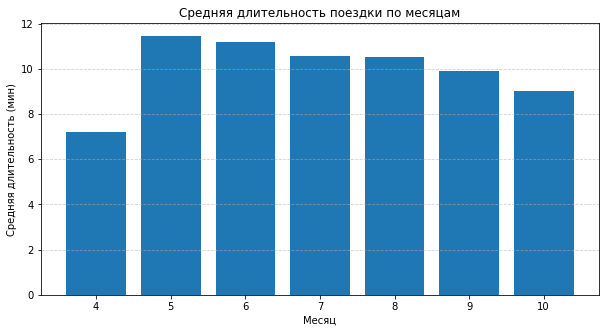

In [107]:
df['month'] = df['book_start_dttm'].dt.month 


mean_duration = df.groupby('month')['booking_duration_min'].mean().sort_index()

plt.figure(figsize=(10,5))
plt.bar(mean_duration.index, mean_duration.values)
plt.title('Средняя длительность поездки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя длительность (мин)')
plt.grid(axis='y')
plt.show()

Месяц с самыми ддлительными поездками Май! Заметен спад по приблиижению к осеннему периоду, становиться холоднее, также как и в апреле

### Среднее кол-во поездок пользователя

In [110]:
avg_rides_per_user = df.groupby('party_rk')['order_rk'].nunique().mean()
display(avg_rides_per_user)

6.309664132873455

### Среднее кол-во поездок пользователя в рразрезе месяца

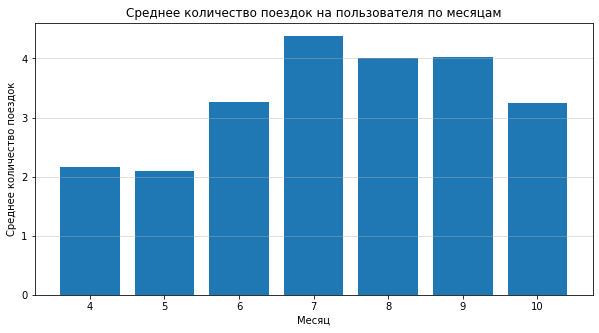

In [109]:
rides_per_user_month = (
    df.groupby(['month', 'party_rk'])['order_rk']
      .count()
      .reset_index(name='rides_count')
)

avg_rides_per_user_month = (
    rides_per_user_month
    .groupby('month')['rides_count']
    .mean()
    .reset_index(name='avg_rides')
)


plt.figure(figsize=(10,5))
plt.bar(avg_rides_per_user_month['month'], avg_rides_per_user_month['avg_rides'])
plt.title('Среднее количество поездок на пользователя по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество поездок')
plt.grid(axis='y')
plt.show()

### Среднее кол-во поездок пользователя в разрезе дня неделии

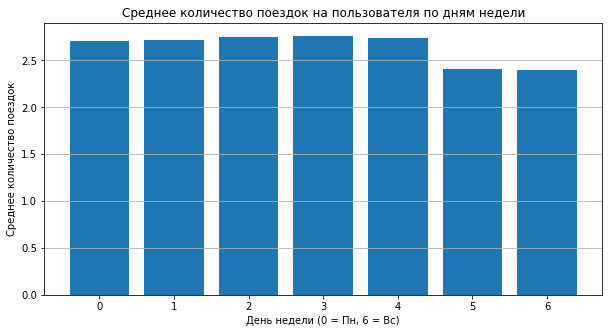

In [115]:
df['day_of_week_num'] = df['book_start_dttm'].dt.dayofweek

rides_per_user_day = df.groupby(['day_of_week_num', 'party_rk'])['order_rk'].count().reset_index(name='rides_count')

avg_rides_per_user_day = rides_per_user_day.groupby('day_of_week_num')['rides_count'].mean().reset_index(name='avg_rides')

plt.figure(figsize=(10,5))
plt.bar(avg_rides_per_user_day['day_of_week_num'], avg_rides_per_user_day['avg_rides'])
plt.title('Среднее количество поездок на пользователя по дням недели')
plt.xlabel('День недели (0 = Пн, 6 = Вс)')
plt.ylabel('Среднее количество поездок')
plt.grid(axis='y')
plt.show()

### Средняя длинна поездки в разрезе дня неделии

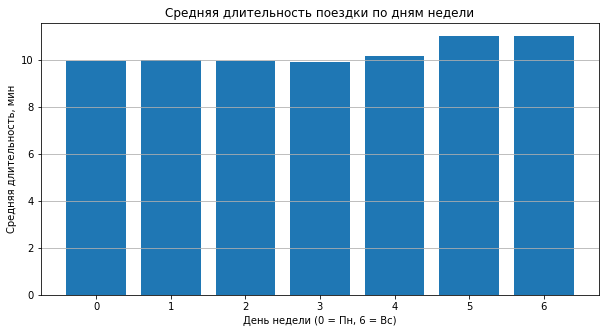

In [117]:
avg_duration_per_day = df.groupby('day_of_week_num')['booking_duration_min'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.bar(avg_duration_per_day['day_of_week_num'], avg_duration_per_day['booking_duration_min'])
plt.title('Средняя длительность поездки по дням недели')
plt.xlabel('День недели (0 = Пн, 6 = Вс)')
plt.ylabel('Средняя длительность, мин')
plt.grid(axis='y')
plt.show()

### DAU

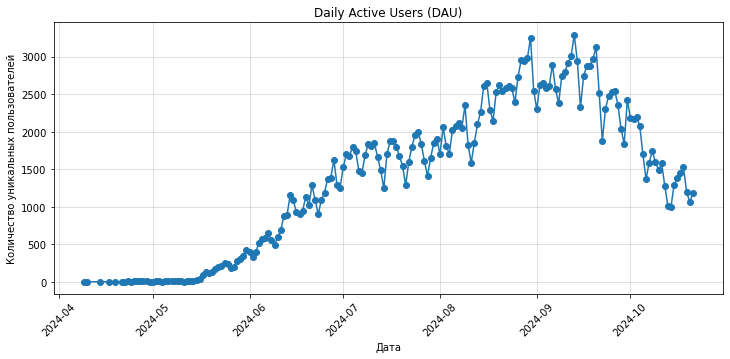

In [118]:

df['date'] = df['book_start_dttm'].dt.date

dau = df.groupby('date')['party_rk'].nunique().reset_index(name='DAU')

plt.figure(figsize=(12,5))
plt.plot(dau['date'], dau['DAU'], marker='o', linestyle='-')
plt.title('Daily Active Users (DAU)')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей')
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

### MAU

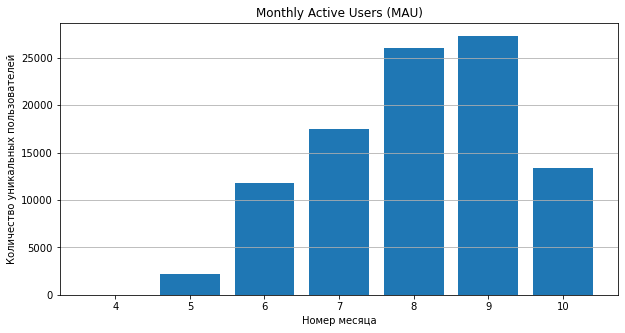

In [121]:
mau = df.groupby('month')['party_rk'].nunique().reset_index(name='MAU')

plt.figure(figsize=(10,5))
plt.bar(mau['month'], mau['MAU'])
plt.title('Monthly Active Users (MAU)')
plt.xlabel('Номер месяца')
plt.ylabel('Количество уникальных пользователей')
plt.grid(axis='y')
plt.show()

### RR по месяцу

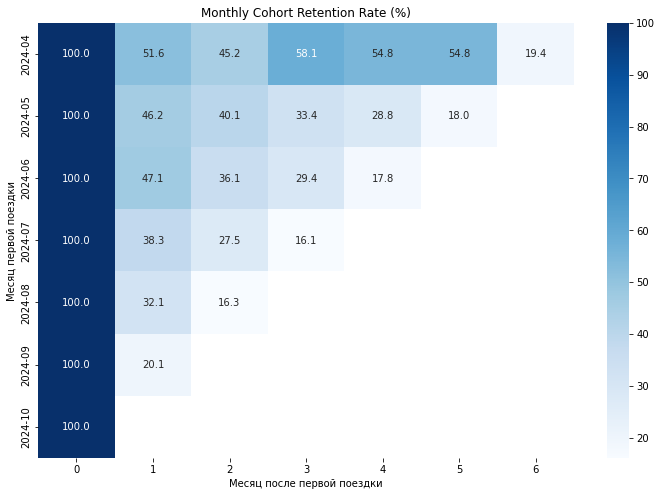

In [126]:
df['first_trip_month'] = df.groupby('party_rk')['book_start_dttm'].transform('min').dt.to_period('M')

df['trip_month'] = df['book_start_dttm'].dt.to_period('M')

df['cohort_index'] = (df['trip_month'] - df['first_trip_month']).apply(lambda x: x.n)

cohort_data = df.groupby(['first_trip_month', 'cohort_index'])['party_rk'].nunique().reset_index()

cohort_counts = cohort_data.pivot(index='first_trip_month', columns='cohort_index', values='party_rk')

cohort_size = cohort_counts.iloc[:,0] 
retention = cohort_counts.divide(cohort_size, axis=0) * 100

plt.figure(figsize=(12,8))
import seaborn as sns
sns.heatmap(retention, annot=True, fmt='.1f', cmap='Blues')
plt.title('Monthly Cohort Retention Rate (%)')
plt.xlabel('Месяц после первой поездки')
plt.ylabel('Месяц первой поездки')
plt.show()

### Активность в разрезе времени суток

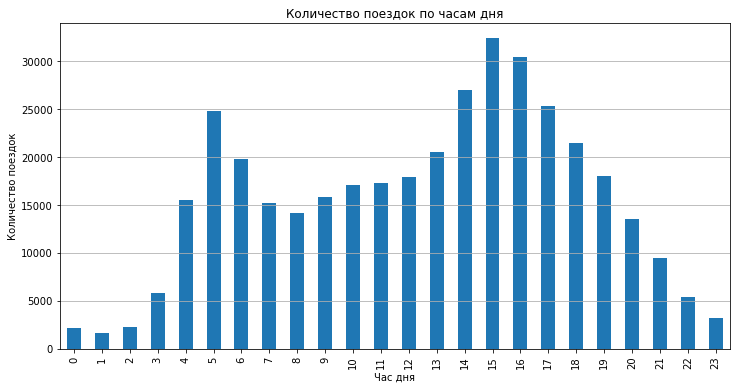

In [129]:
df['hour'] = df['local_book_start_dttm'].dt.hour

# 2. Считаем количество поездок по часам
trips_per_hour = df.groupby('hour')['order_rk'].count()

# 3. Строим график
plt.figure(figsize=(12,6))
trips_per_hour.plot(kind='bar')
plt.title('Количество поездок по часам дня')
plt.xlabel('Час дня')
plt.ylabel('Количество поездок')
plt.grid(axis='y')
plt.show()

## Выводы

В средняя длительность поездок пользователя 10 минут

чуть больше чем 6 поездок в срреднем совершил каждый пользотваель за весь период

Видно что есть связь с днем недели, зачастую по будням поездок больше, но они короче(все едут на работу и с работы), по ввыходным поездки более непринужденные

Пиковые загруженности соотв. маятниковым миграциям на работу/учебу и обратно

В среднем пользователи катаются дольше и больше в теплое время года

Логично что активвность пользователей падает при приближении зимы становится холодно и опасно ездить, зимой в некоторых городах вообще убирают самокаты

Замечание, пользователи, которые начали использовать сервис в начале сезона, как правило, остаются более активными на протяжении всего сезона. Это можно наблюдать через Retention Rate (RR) по когортам пользователей.

Предоставление бесплатного первого старта в первый месяц сезона может повысить вовлечённость новых пользователей, особенно тех, кто присоединился в начале сезона.